# Classification of clients in an internet shopping mall.

Notebook 1: Cleaning dataframes (checking duplicate, removing outliers etc)

Overall purpose of the study: \
To cluster customers in different groups with specific characteristics such as shopping habits, type of items and feature engineered characteristics.

**First of all, let's implement the fuctions that allow to perform the dataframe cleaning in a fast and efficient manner**

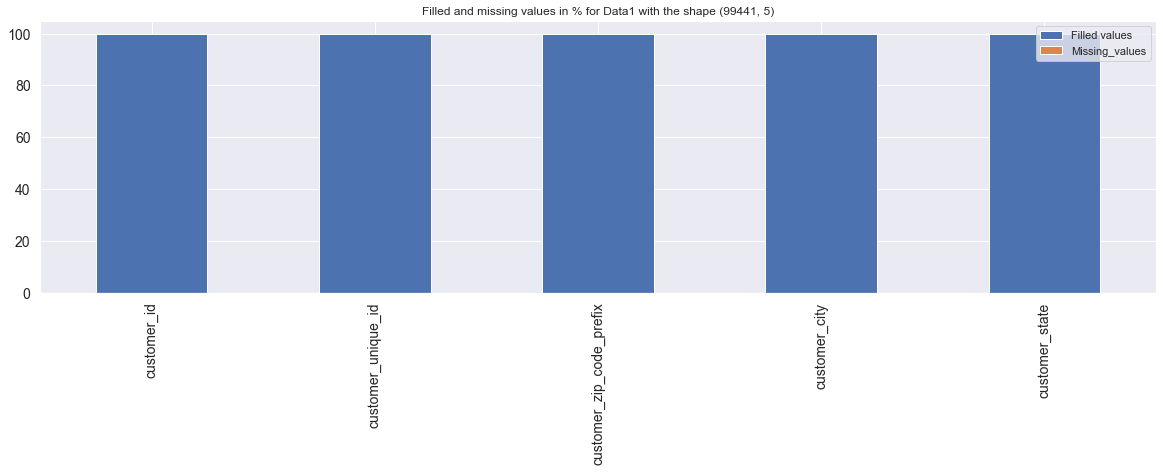

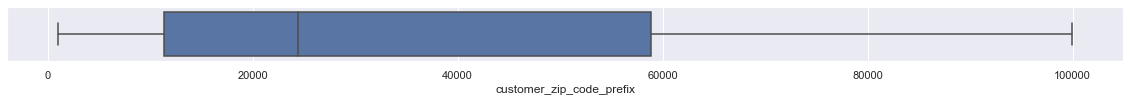

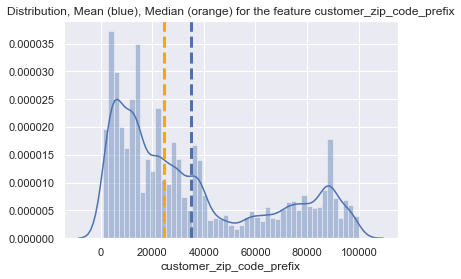

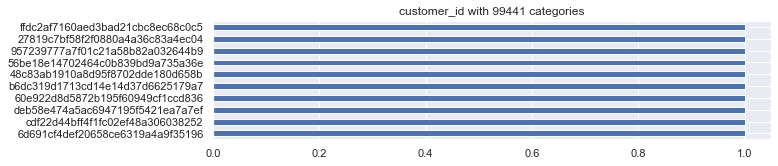

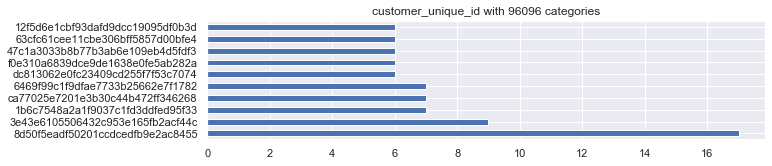

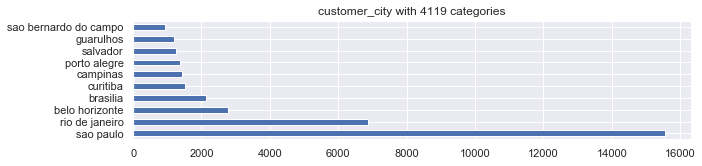

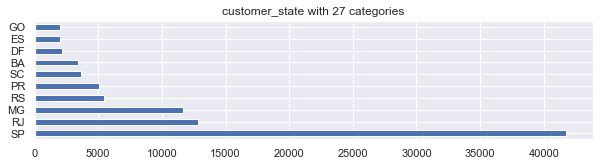

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP

In [25]:
#import libraires
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Full Analysis of the dataframe
def Full_Analysis_df(data_frame,str1ng):
    Meta_df(data_frame,str1ng)
    Analysis_non_obj_df(data_frame)
    Hist_comp_non_obj_df(data_frame)
    Analysis_obj_df(data_frame)    
    return

# Analysis of the metadata of dataframe
def Meta_df(data_frame,str1ng):
    Meta_data = ((pd.DataFrame({'Filled values':pd.notnull(data_frame).sum(), 'Missing_values':pd.isnull(data_frame).sum()})
                 /(data_frame.shape[0]/100)).sort_values(by=['Missing_values'], ascending=False))
    (Meta_data.plot.bar(stacked=True,
                        figsize=(20,5),
                        title = 'Filled and missing values in % for {} with the shape {}'.format(str1ng,data_frame.shape),
                        fontsize = 14))
    return Meta_data

# Analysis of the columns containing objects
def Analysis_obj_df(data_frame):
    data_frame_obj = data_frame.select_dtypes(include='object')
    Nb_col_data_frame_obj = data_frame_obj.shape[1]
    fig1 = plt.figure(figsize=(10, 10*Nb_col_data_frame_obj))
    icb = 1
    for col_data_frame_obj in data_frame_obj:
        nb_cat_temp = len(data_frame_obj[col_data_frame_obj].unique())
        plt.subplot(Nb_col_data_frame_obj,1,icb)
        data_frame_obj[col_data_frame_obj].value_counts()[:10].plot(kind='barh', 
                                                                    figsize=(10,10), 
                                                                    title = '{} with {} categories'.format(col_data_frame_obj,nb_cat_temp))
        plt.show()
        icb += 1
    return

# Analysis of the columns not containing objects
def Analysis_non_obj_df(data_frame):
    data_frame_Nobj = data_frame.select_dtypes(exclude='object')
    Nb_col_data_frame_Nobj = data_frame_Nobj.shape[1]
    fig = plt.figure(figsize=(20, 1*Nb_col_data_frame_Nobj))
    ic = 1
    sns.set(font_scale = 1)
    for col_data_frame_Nobj in data_frame_Nobj:
        plt.subplot(Nb_col_data_frame_Nobj,1,ic)
        sns.boxplot(x=data_frame_Nobj[col_data_frame_Nobj])
        fig.subplots_adjust(hspace=2)
        ic += 1
    plt.show()
    return

# Function plotting histograms, distribution plots, mean and median for features containing numerical values
def Hist_comp_non_obj_df(data_frame):
    data_frame_Nobj = data_frame.select_dtypes(exclude='object').dropna()
    Nb_col_data_frame_Nobj = data_frame_Nobj.shape[1]
    ih = 1
    for col_data_frame_Nobj in data_frame_Nobj:
        arr_temp = data_frame_Nobj[col_data_frame_Nobj]
        plt.figure(figsize=(6, 4))
        ax_temp = sns.distplot(arr_temp)
        plt.axvline(np.mean(arr_temp), color='b', linestyle='dashed', linewidth=3)
        plt.axvline(np.median(arr_temp), color='orange', linestyle='dashed', linewidth=3)
        plt.title('Distribution, Mean (blue), Median (orange) for the feature {}'.format(col_data_frame_Nobj))
        plt.show()
    return

# Function checking the boxplots of a target for each categories 
# of features with less than cat_limit (default 30 categories)
def Box_taget_cat(data_frame,target,cat_limit=30):
    data_frame_obj = data_frame.select_dtypes(include='object')
    Nb_col_data_frame_obj = data_frame_obj.shape[1]
    for col_data_frame_obj in data_frame_obj:
        nb_cat_temp = len(data_frame_obj[col_data_frame_obj].unique())
        if nb_cat_temp <= cat_limit:
            cat_temp = sns.catplot(x=col_data_frame_obj,
                                   y=target,
                                   kind="box", 
                                   data=data_frame, 
                                   height = 4,
                                   aspect = 2)
            cat_temp.set_xticklabels(rotation=90)
            plt.show()
        else:
            continue
    return

# Function checking the mean and standard deviation of a target for each categories 
# of features with less than cat_limit (default 30 categories)
def Mean_std_target_cat(data_frame,target,cat_limit=30,fig_length=8,fig_height=4):
    data_frame_obj = data_frame.select_dtypes(include='object')
    Nb_col_data_frame_obj = data_frame_obj.shape[1]
    for col_data_frame_obj in data_frame_obj:
        nb_cat_temp = len(data_frame_obj[col_data_frame_obj].unique())
        if nb_cat_temp <= cat_limit:
            list_temp = [col_data_frame_obj,target]
            mean_targ_cat =data_frame[list_temp].groupby(col_data_frame_obj).mean() 
            std_targ_cat =data_frame[list_temp].groupby(col_data_frame_obj).std()
            plt.figure(figsize=(fig_length, fig_height))
            plt.errorbar(mean_targ_cat.index, 
                         mean_targ_cat[target],
                         std_targ_cat[target], 
                         fmt='o', color='blue',ecolor='c', elinewidth=3, capsize=0)
            plt.xticks(rotation=90)
            plt.title('{}: Mean and Standard Dev. for each {}'.format(target,col_data_frame_obj))
        else:
            continue
    return

# Function checking the potential linear relationship between a target and features containing numerical values
def Target_Nobj_pairpl(data_frame,target):
    data_frame_Nobj = data_frame.drop(columns=target).select_dtypes(exclude='object')
    list_Nobj = list(data_frame_Nobj.columns)
    Nb_col_data_frame_Nobj = data_frame_Nobj.shape[1]
    min_list = np.arange(0,Nb_col_data_frame_Nobj,5).tolist()
    max_list = np.arange(5,Nb_col_data_frame_Nobj,5).tolist()
    l_min_list = len(min_list)
    l_max_list = len(max_list)
    if l_min_list > l_max_list:
        max_list.insert(l_min_list, Nb_col_data_frame_Nobj)
    else:
            pass
    for ia, ib in list(zip(min_list, max_list)):
#        print(ia,ib)
        pp_temp = sns.pairplot(data = data_frame,
                  y_vars=[target],
                  x_vars=list_Nobj[ia:ib], 
                  kind="reg", 
                  height = 3)    
    return

# Fonction filtering by default values between Q1-1.5IQR and Q3+1.5IQR: Outliers remover
def FilterIQR(data_frame,str1ng,kiqr=1.5):
    Q1 = data_frame[str1ng].quantile(0.25)
    Q3 = data_frame[str1ng].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (kiqr * IQR)
    high_limit = Q3 + (kiqr * IQR)
    data_frame = data_frame.drop(data_frame[(data_frame[str1ng] > high_limit) 
                                                           | (data_frame[str1ng] < low_limit)].index)
    return data_frame

# Fonction filling the missing values with predicted values based on kNN on the df limited to the list of features, 
# inputs: the entire df and the list of features which are taken into account in the kNN
# output: the entire df with filled with predicted values only the features selected in the list.
def KNN_in_df(data_frame,list1):
    imputer = KNNImputer(n_neighbors=2)
    df_restriced = data_frame[list1]
    data_frame_truncated = data_frame.reset_index().drop(columns=df_restriced.columns)
    arr_restriced = imputer.fit_transform(df_restriced)
    new_df_restricted = pd.DataFrame(arr_restriced,columns=df_restriced.columns).reset_index()
    new_df = data_frame_truncated.merge(new_df_restricted, left_index=True, right_index=True).drop(columns=['index_x','index_y'])
    return new_df

# uploader le fichier du dataset principal en csv
data1 = pd.read_csv('olist_customers_dataset.csv')

# Analyse du data set
Full_Analysis_df(data1,'Data1')
data1.head()

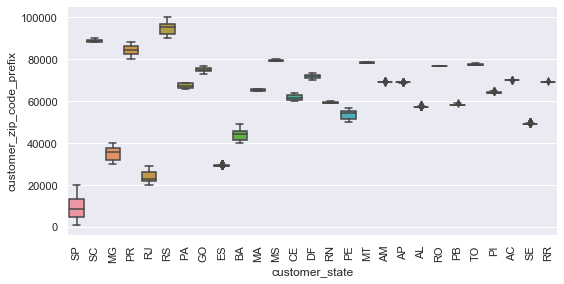

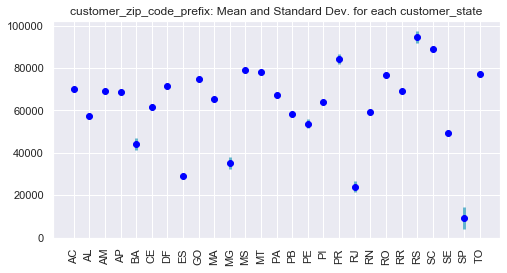

In [3]:
Box_taget_cat(data1,'customer_zip_code_prefix')
Mean_std_target_cat(data1,'customer_zip_code_prefix')

**'Box_taget_cat' and 'Mean_std_target_cat' help to check visualy how customer_zip_code and customer_state are correlated. For more accurate results my ANOVA funtion (presented later in the notebook) can be used.**

**Below, duplicates are checked**

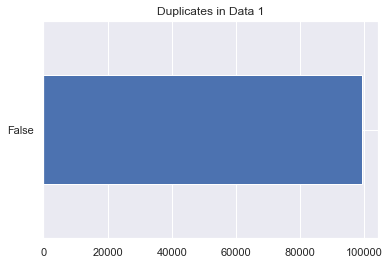

In [4]:
duplicate_rows_data1 = data1.duplicated(subset=None, keep='first')
duplicate_rows_data1.value_counts().plot(kind='barh',title = 'Duplicates in Data 1')
plt.show()

**'customer_unique_id' used for computing the purchase frequency**

In [6]:
# let's keep the state and remove the city
data1_simp = data1.drop(columns=['customer_city'])
data1_simp['Counts'] = data1_simp.groupby(['customer_unique_id'])['customer_id'].transform('count')
data1_simp.sort_values(by='Counts', ascending=False)

customer_id                customer_unique_id  \
15321  a8fabc805e9a10a3c93ae5bff642b86b  8d50f5eadf50201ccdcedfb9e2ac8455   
36122  b2b13de0770e06de50080fea77c459e6  8d50f5eadf50201ccdcedfb9e2ac8455   
72745  3414a9c813e3ca02504b8be8b2deb27f  8d50f5eadf50201ccdcedfb9e2ac8455   
16654  897b7f72042714efaa64ac306ba0cafc  8d50f5eadf50201ccdcedfb9e2ac8455   
74510  0e4fdc084a6b9329ed55d62dcd653ccf  8d50f5eadf50201ccdcedfb9e2ac8455   
...                                 ...                               ...   
34232  54567959bcb46224d38c717de98439f1  d9e738179ad7021b54ee508f75262ff4   
34231  da78330582f1c9cd7b9bed4c3453f269  7ab7fd32096f1df75a29d00683c46b4a   
34230  0e48cc6ff4697cd603cd84a57d3732d4  700e5a2aa50c64c74819d33fa99e3382   
34229  43ef6d921801cd218aa1933147cc312b  51a1ead0ba50c55efd446d0f057c4e2a   
99440  274fa6071e5e17fe303b9748641082c8  84732c5050c01db9b23e19ba39899398   

       customer_zip_code_prefix customer_state  Counts  
15321                      4045             SP      17  
36122                      4045             SP      17  
72745                      4045             SP      17  
16654                      4045             SP      17  
74510                      4045             SP      17  
...                         ...            ...     ...  
34232                      8564             SP       1  
34231                      9071             SP       1  
34230                     11380             SP       1  
34229                     31155             MG       1  
99440                      6703             SP       1  

[99441 rows x 5 columns]

**Counts represents the number of purchase for each client**

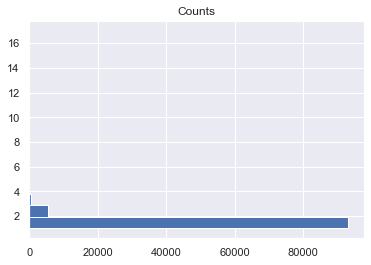

In [7]:
data1_simp[['Counts']].hist(bins=17,orientation="horizontal")
plt.show()

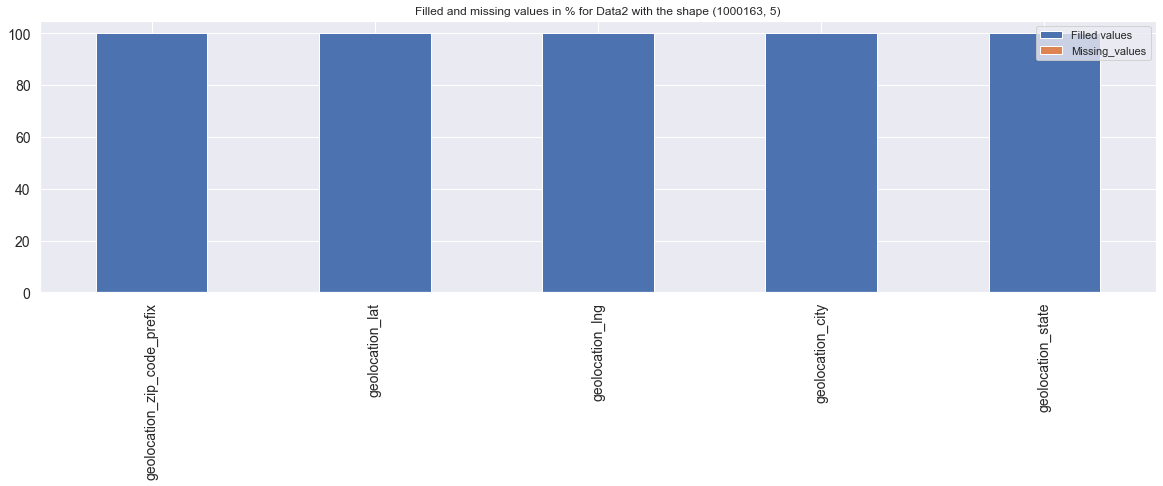

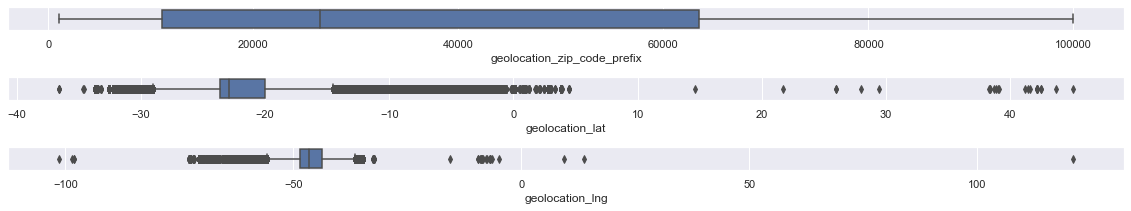

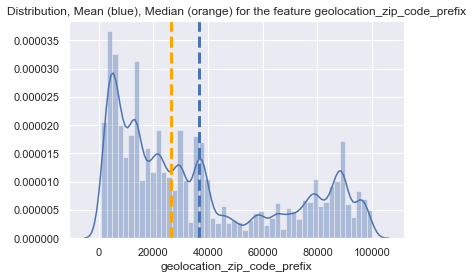

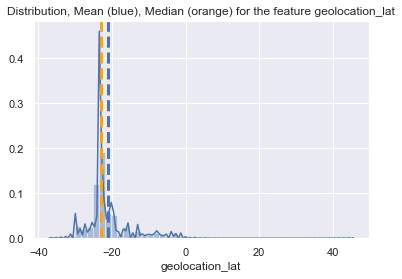

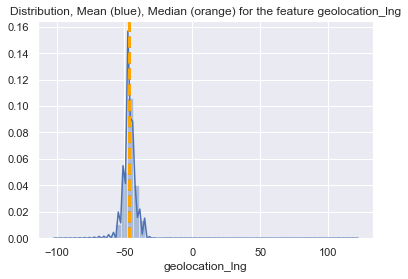

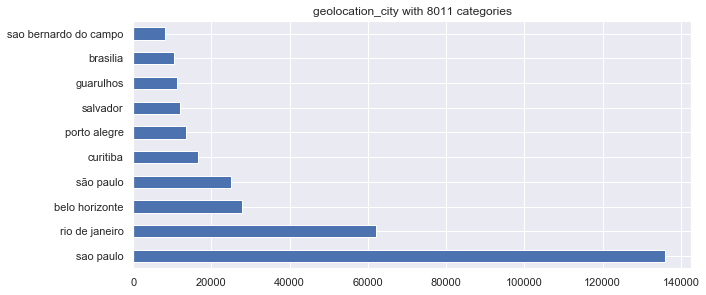

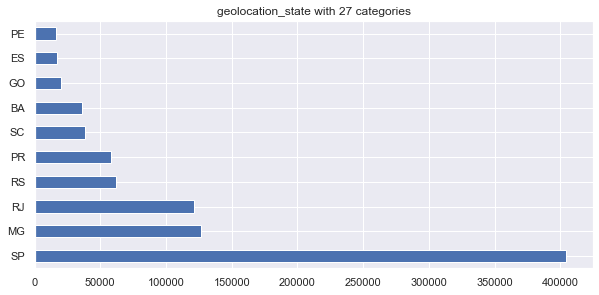

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                         1037       -23.545621       -46.639292   
1                         1046       -23.546081       -46.644820   
2                         1046       -23.546129       -46.642951   
3                         1041       -23.544392       -46.639499   
4                         1035       -23.541578       -46.641607   

  geolocation_city geolocation_state  
0        sao paulo                SP  
1        sao paulo                SP  
2        sao paulo                SP  
3        sao paulo                SP  
4        sao paulo                SP

In [8]:
# upload the second dataset
data2 = pd.read_csv('olist_geolocation_dataset.csv')

# Perform a full analysis of the dataset 
Full_Analysis_df(data2,'Data2')
data2.head()

**Checking the spatial location of the states**

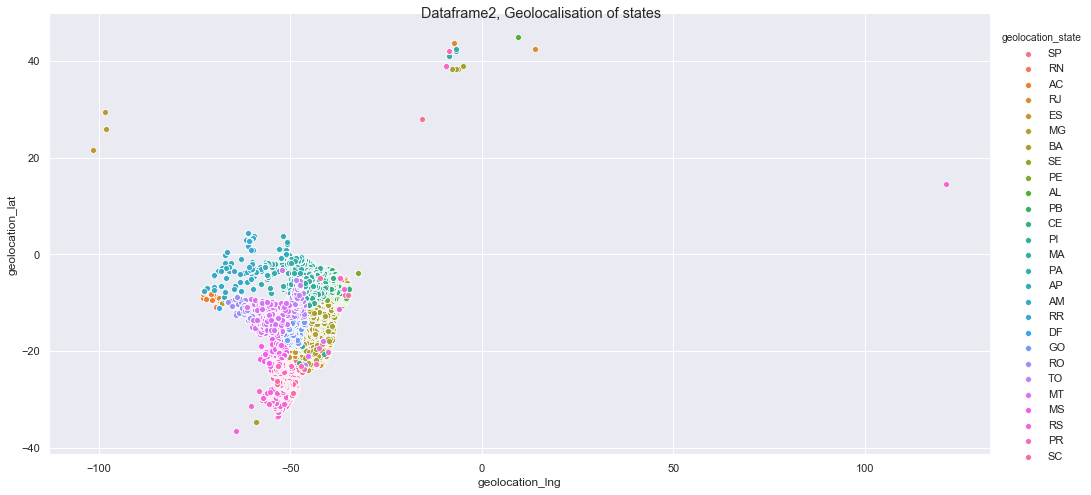

In [11]:
geo_state = sns.pairplot(data = data2,
                        y_vars=['geolocation_lat'],
                        x_vars=['geolocation_lng'], 
                        hue='geolocation_state', 
                        height = 7, 
                        aspect=2)
geo_state.fig.suptitle("Dataframe2, Geolocalisation of states")
plt.show()

**Compute the average latitude and longitude moyenne for each zip code**

In [9]:
data2_simp = data2.drop(columns=['geolocation_city','geolocation_state'])
data2_simp.rename(columns={'geolocation_zip_code_prefix':'customer_zip_code_prefix'}, inplace=True)
data2_grp_review = data2_simp.groupby(['customer_zip_code_prefix']).mean().reset_index()
data2_grp_review.head()

customer_zip_code_prefix  geolocation_lat  geolocation_lng
0                      1001       -23.550190       -46.634024
1                      1002       -23.548146       -46.634979
2                      1003       -23.548994       -46.635731
3                      1004       -23.549799       -46.634757
4                      1005       -23.549456       -46.636733

**zip code spreading in Brazil**

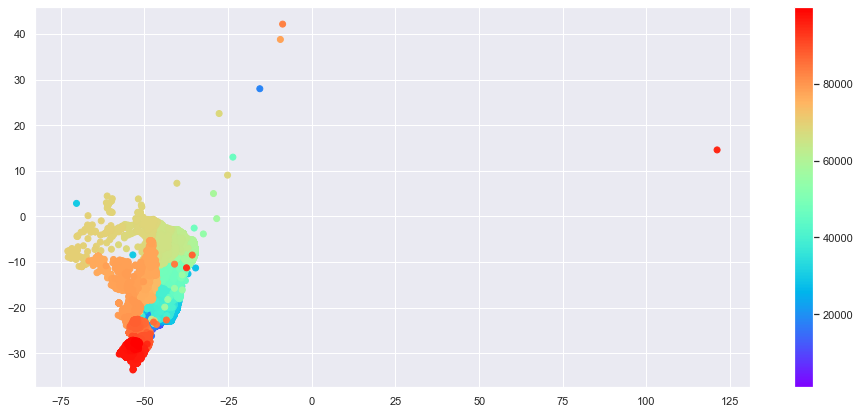

In [13]:
plt.figure(figsize=(16, 7))
plt.scatter(data2_grp_review['geolocation_lng'],
            data2_grp_review['geolocation_lat'], 
            c=data2_grp_review['customer_zip_code_prefix'], 
            cmap='rainbow')
plt.colorbar()
plt.show()

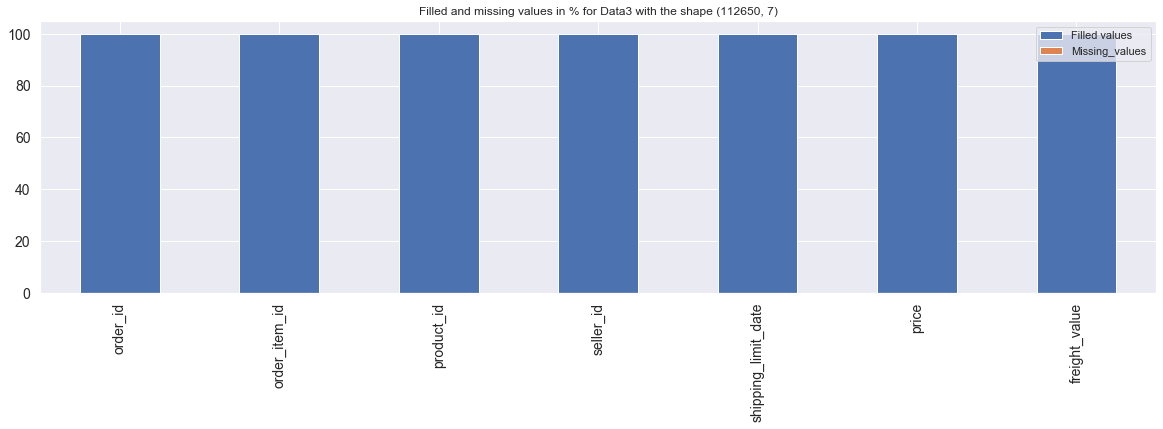

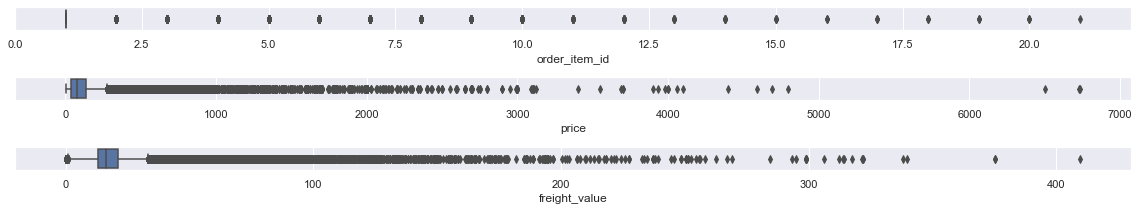

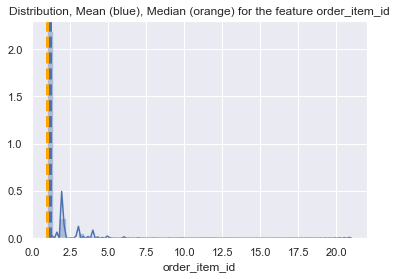

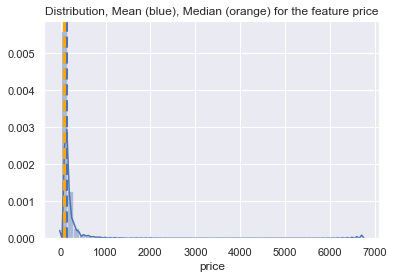

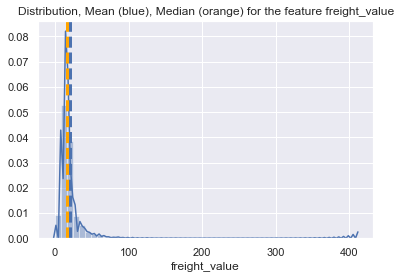

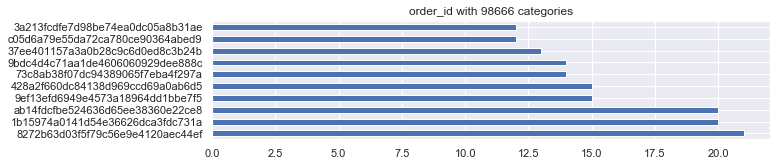

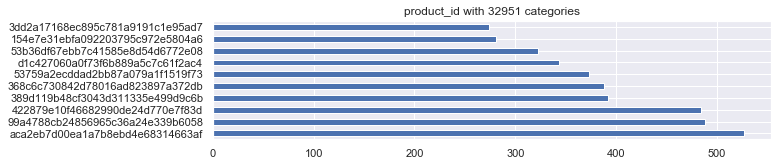

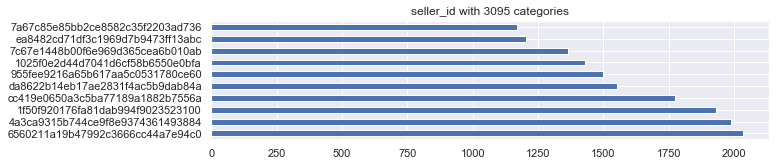

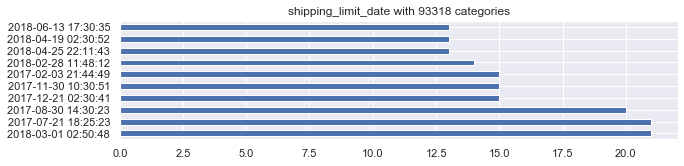

order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

   shipping_limit_date   price  freight_value  
0  2017-09-19 09:45:35   58.90          13.29  
1  2017-05-03 11:05:13  239.90          19.93  
2  2018-01-18 14:48:30  199.00          17.87  
3  2018-08-15 10:10:18   12.99          12.79  
4  2017-02-13 13:57:51  199.90          18.14

In [11]:
# upload the third dataset
data3 = pd.read_csv('olist_order_items_dataset.csv')
# Perform a full analysis of the dataset 
Full_Analysis_df(data3,'Data3')
data3.head()

**Checking the potential correlation between the price and the freight value**

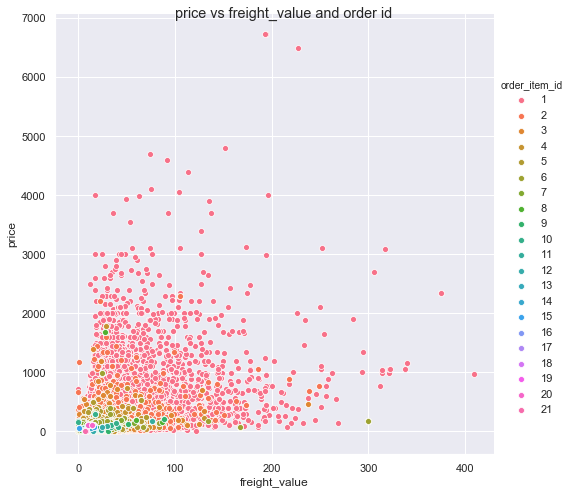

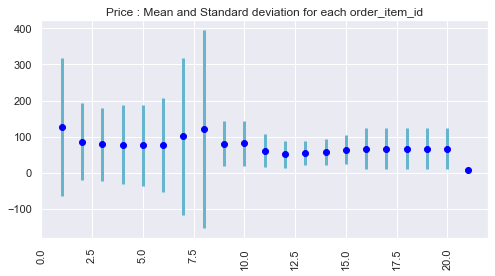

In [15]:
price_freight = sns.pairplot(data = data3,
                             y_vars=['price'],
                             x_vars=['freight_value'],
                             hue= 'order_item_id', 
                             height = 7)
price_freight.fig.suptitle("price vs freight_value and order id")
plt.show()

mean_ord_price =data3[['order_item_id','price']].groupby('order_item_id').mean() 
std_ord_price =data3[['order_item_id','price']].groupby('order_item_id').std()

plt.figure(figsize=(8, 4))
plt.errorbar(mean_ord_price.index, mean_ord_price['price'],
             std_ord_price['price'], 
             fmt='o', color='blue',ecolor='c', elinewidth=3, capsize=0)
plt.xticks(rotation=90)
plt.title('Price : Mean and Standard deviation for each order_item_id')
plt.show()

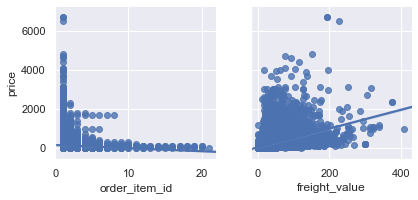

In [19]:
Target_Nobj_pairpl(data3,'price')

**'seller_id' is irrelevant to capture customer's behavior**

**'shipping_limit_date' is out of control of the customer**

In [12]:
data3_simp = data3.drop(columns=['seller_id','shipping_limit_date'])

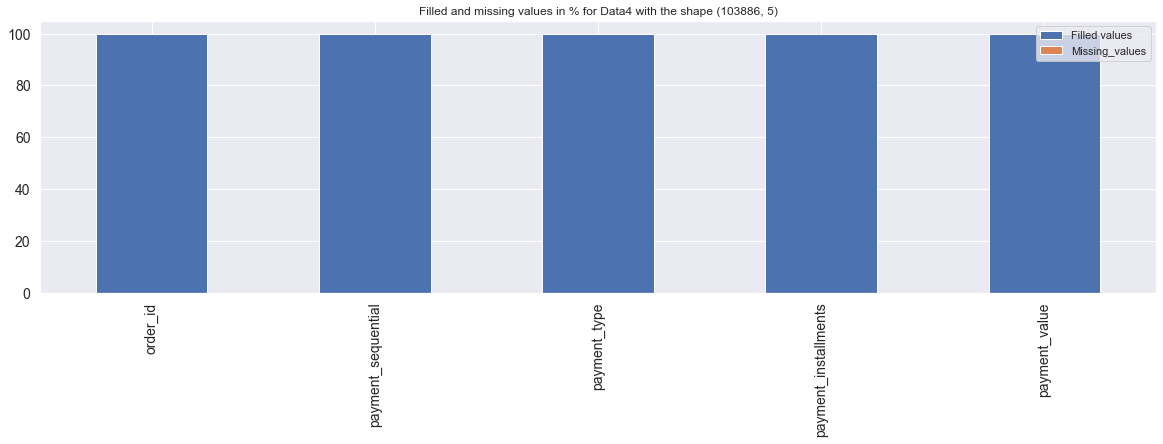

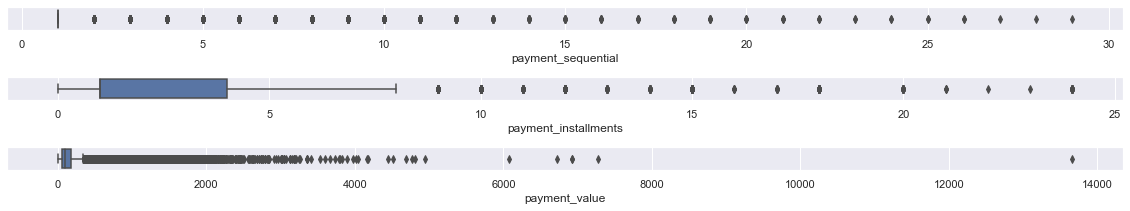

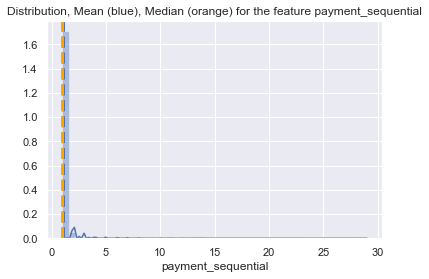

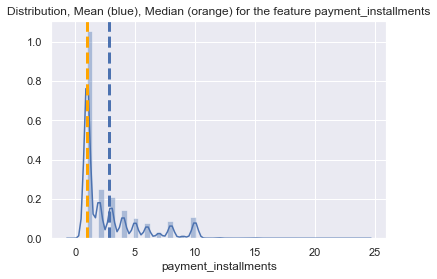

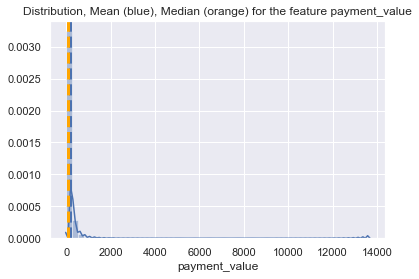

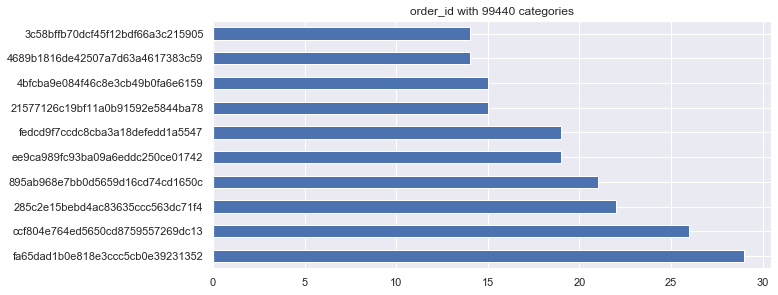

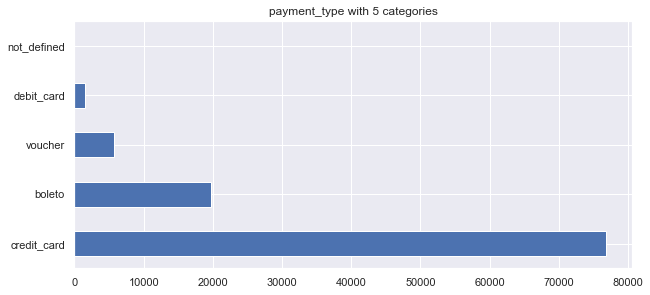

order_id  payment_sequential payment_type  \
0  b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1  a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2  25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   
3  ba78997921bbcdc1373bb41e913ab953                   1  credit_card   
4  42fdf880ba16b47b59251dd489d4441a                   1  credit_card   

   payment_installments  payment_value  
0                     8          99.33  
1                     1          24.39  
2                     1          65.71  
3                     8         107.78  
4                     2         128.45

In [13]:
# upload the fourth dataset
data4 = pd.read_csv('olist_order_payments_dataset.csv')
# Perform a full analysis
Full_Analysis_df(data4,'Data4')
data4.head()

**data4: remove payment not defined.**

In [15]:
data4_simp= data4[data4['payment_type'] != 'not_defined']

**Checking potential correlation between payment_value and the other features in data4. ANOVA test is also performed.**

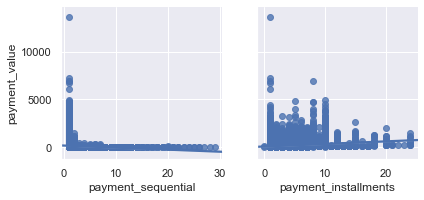

In [24]:
Target_Nobj_pairpl(data4_simp,'payment_value')

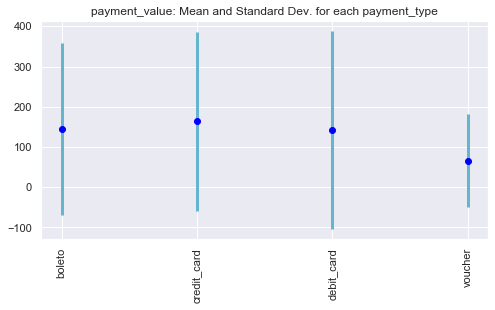

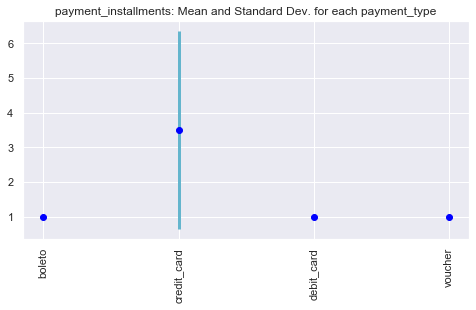

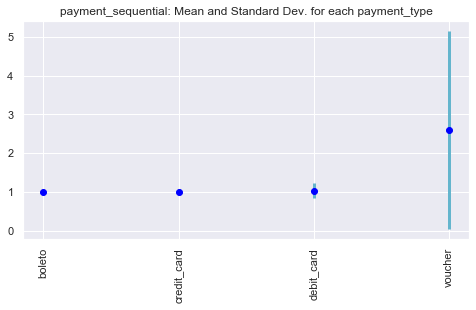

In [25]:
Mean_std_target_cat(data4_simp,'payment_value')
Mean_std_target_cat(data4_simp,'payment_installments')
Mean_std_target_cat(data4_simp,'payment_sequential')

In [17]:
from scipy.stats import f_oneway
df_anova_nbgh = data4_simp[['payment_value','payment_type']]
grps = pd.unique(df_anova_nbgh['payment_type'].values)
d_data = {grp:df_anova_nbgh['payment_value'][df_anova_nbgh['payment_type'] == grp] for grp in grps}
f_anova, p_anova = f_oneway(d_data['boleto'], 
                            d_data['credit_card'], 
                            d_data['debit_card'],
                            d_data['voucher'])
print('Anova test on: payment_value and payment_type, F value=%.3f, P value=%.8f' % (f_anova, p_anova))

Anova test on: payment_value and payment_type, F value=380.998, P value=0.00000000


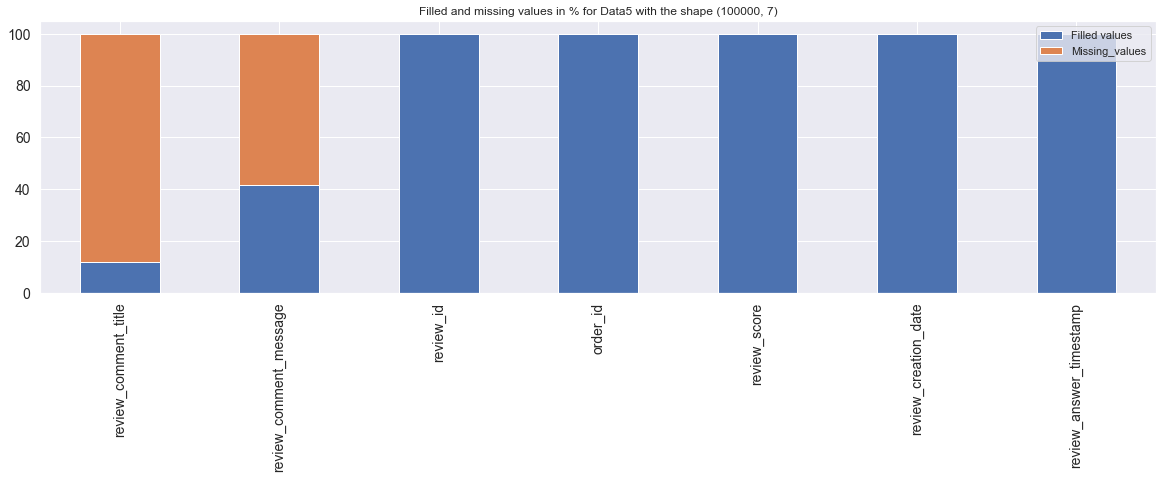

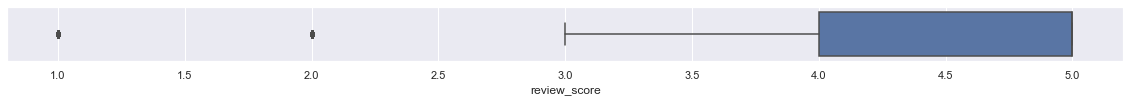

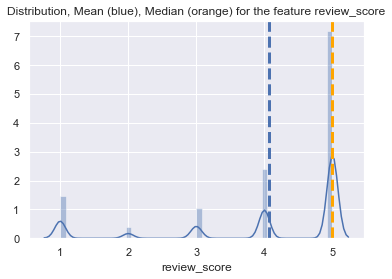

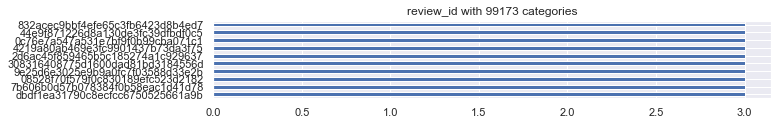

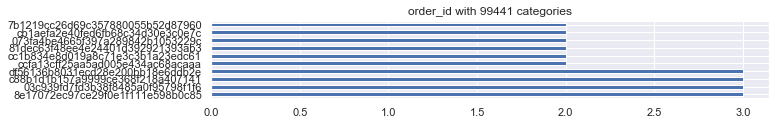

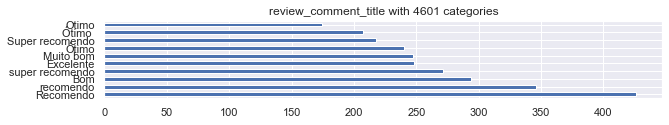

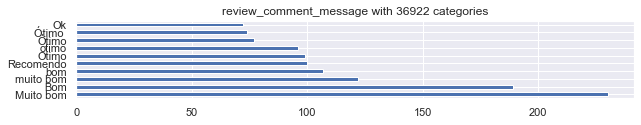

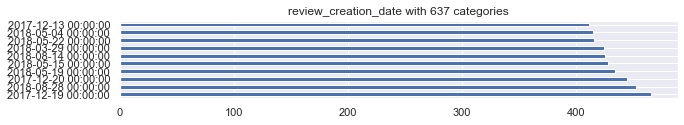

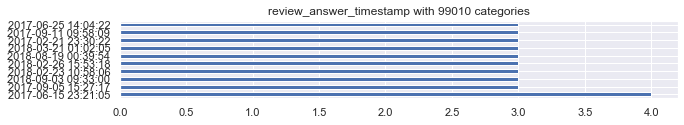

review_id                          order_id  \
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1  80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2  228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3  e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4  f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   

   review_score review_comment_title  \
0             4                  NaN   
1             5                  NaN   
2             5                  NaN   
3             5                  NaN   
4             5                  NaN   

                              review_comment_message review_creation_date  \
0                                                NaN  2018-01-18 00:00:00   
1                                                NaN  2018-03-10 00:00:00   
2                                                NaN  2018-02-17 00:00:00   
3              Recebi bem antes do prazo estipulado.  2017-04-21 00:00:00   
4  Parabéns lojas lannister adorei comprar pela I...  2018-03-01 00:00:00   

  review_answer_timestamp  
0     2018-01-18 21:46:59  
1     2018-03-11 03:05:13  
2     2018-02-18 14:36:24  
3     2017-04-21 22:02:06  
4     2018-03-02 10:26:53

In [18]:
# upload the fifth dataset
data5 = pd.read_csv('olist_order_reviews_dataset.csv')
# Perform the full analysis of the dataset
Full_Analysis_df(data5,'Data5')
data5.head()

**'review_comment_title' and 'review_comment_message' are barely filled while 'review_score' has enough data.**

**'review_creation_date','review_answer_timestamp' would be relevant for observing the trends on a specific product which not the case of our study.**

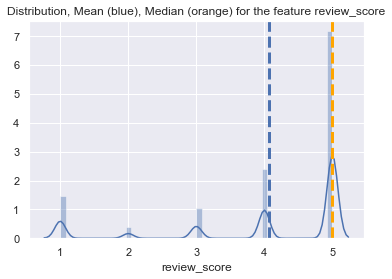

In [28]:
List_data5_drp = (['review_comment_title','review_comment_message', 'review_creation_date','review_answer_timestamp'])
data5_simp = data5.drop(columns=List_data5_drp)
data5_grp_review = data5_simp.groupby(['order_id'])['review_score'].mean().to_frame().reset_index()
Hist_comp_non_obj_df(data5_grp_review)

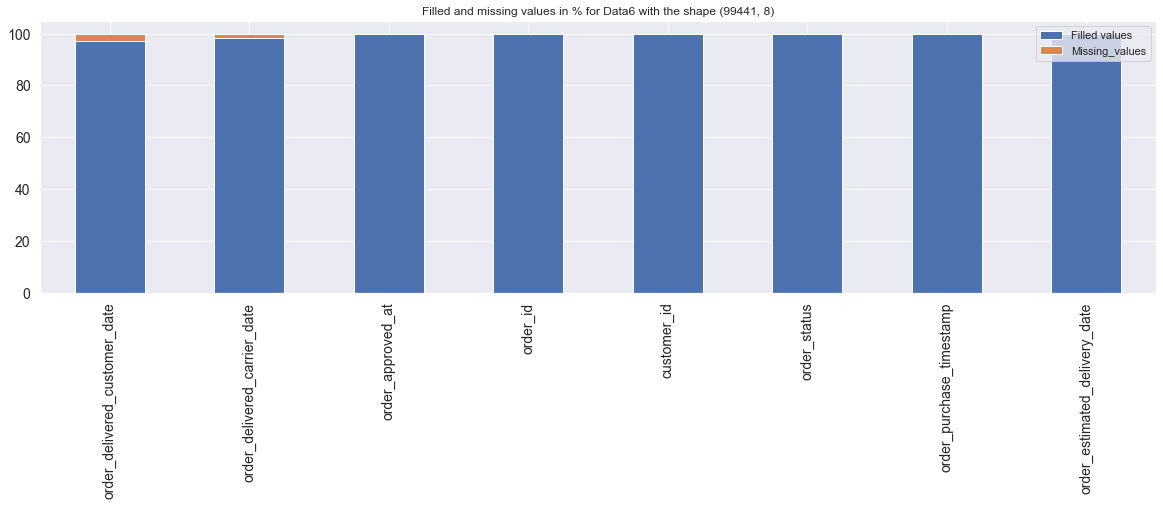

<Figure size 1440x0 with 0 Axes>

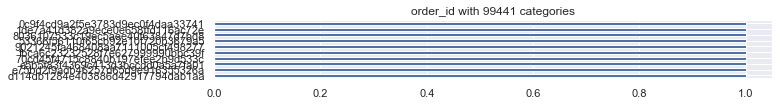

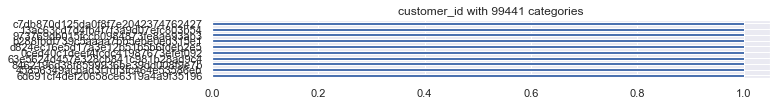

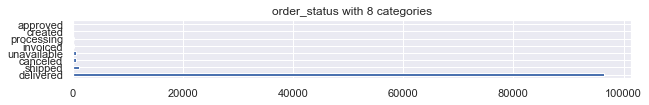

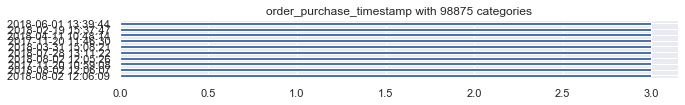

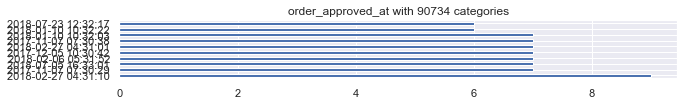

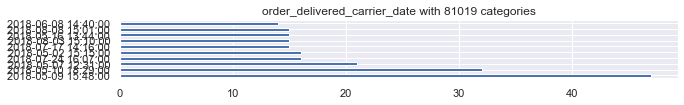

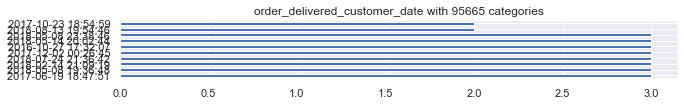

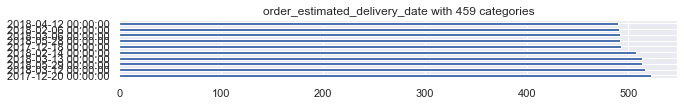

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date  
0           2017-10-18 00:00:00  
1           2018-08-13 00:00:00  
2           2018-09-04 00:00:00  
3           2017-12-15 00:00:00  
4           2018-02-26 00:00:00

In [19]:
# upload the sixth dataset
data6 = pd.read_csv('olist_orders_dataset.csv')
# Perfom full analysis of the dataset
Full_Analysis_df(data6,'Data6')
data6.head()

**data6, drop rows without values in 'order_delivered_customer_date','order_estimated_delivery_date' etc.**

In [20]:
data6_simp_inter = data6.dropna(subset=(['order_approved_at',
                                         'order_delivered_carrier_date',
                                         'order_delivered_customer_date',
                                         'order_estimated_delivery_date'])).drop(columns=['order_approved_at',
                                                                                          'order_delivered_carrier_date'])

**In 'orders_status' non delivered are too few to get a relevant information**

In [21]:
data6_simp = data6_simp_inter[data6_simp_inter['order_status'] == 'delivered'].drop(columns='order_status')

**Handling time to store meaninful features: 'delivered_purchase_Dtime', a time difference between delivery and purchase  and 'estimated_delivered_Dtime', a time difference between the estimated delivered time and the delivery time.**

In [22]:
import datetime
from dateutil.relativedelta import relativedelta
from datetime import date

data6_time_features = pd.DataFrame({'purchase_time':(pd.to_datetime(data6_simp['order_purchase_timestamp']))
                      ,'delivered_time':(pd.to_datetime(data6_simp['order_delivered_customer_date']))
                     ,'estimated_delivered_time':(pd.to_datetime(data6_simp['order_estimated_delivery_date']))})

data6_time_features['delivered_purchase_Dtime'] = ((data6_time_features['delivered_time'] 
                                                   - data6_time_features['purchase_time'])
                                                   /np.timedelta64(1,'D'))
data6_time_features['estimated_delivered_Dtime'] = ((data6_time_features['estimated_delivered_time'] 
                                                   - data6_time_features['delivered_time'])
                                                   /np.timedelta64(1,'D'))
timeframe_df = (data6_time_features['purchase_time'].max() - data6_time_features['purchase_time'].min())/np.timedelta64(1,'M')

print('The time frame of the data is {} months'.format(timeframe_df))

data6_time_features.head()

The time frame of the data is 23.429273777771694 months


purchase_time      delivered_time estimated_delivered_time  \
0 2017-10-02 10:56:33 2017-10-10 21:25:13               2017-10-18   
1 2018-07-24 20:41:37 2018-08-07 15:27:45               2018-08-13   
2 2018-08-08 08:38:49 2018-08-17 18:06:29               2018-09-04   
3 2017-11-18 19:28:06 2017-12-02 00:28:42               2017-12-15   
4 2018-02-13 21:18:39 2018-02-16 18:17:02               2018-02-26   

   delivered_purchase_Dtime  estimated_delivered_Dtime  
0                  8.436574                   7.107488  
1                 13.782037                   5.355729  
2                  9.394213                  17.245498  
3                 13.208750                  12.980069  
4                  2.873877                   9.238171

**Checking the relationship between the 2 new created features and their respective distributions.**

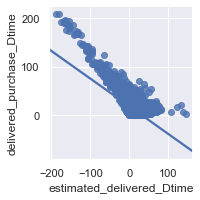

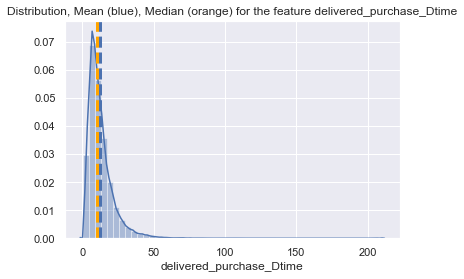

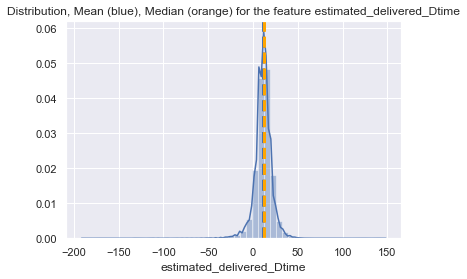

In [35]:
Target_Nobj_pairpl(data6_time_features[['delivered_purchase_Dtime','estimated_delivered_Dtime']],'delivered_purchase_Dtime')
Hist_comp_non_obj_df(data6_time_features[['delivered_purchase_Dtime','estimated_delivered_Dtime']]) 

**Creating the 'Frequency_in_month' feature based on the feature 'Counts' and variable 'timeframe_df'. Cheking the 'Frequency_in_month' feature and its relationship with customer_state.**

In [23]:
data1_simp['Frequency_in_month'] = data1_simp['Counts'].div(timeframe_df).drop(columns='Counts')
data1_simp.drop(columns='Counts', inplace = True)
data1_simp.sort_values(by='Frequency_in_month', ascending=False)

customer_id                customer_unique_id  \
15321  a8fabc805e9a10a3c93ae5bff642b86b  8d50f5eadf50201ccdcedfb9e2ac8455   
36122  b2b13de0770e06de50080fea77c459e6  8d50f5eadf50201ccdcedfb9e2ac8455   
72745  3414a9c813e3ca02504b8be8b2deb27f  8d50f5eadf50201ccdcedfb9e2ac8455   
16654  897b7f72042714efaa64ac306ba0cafc  8d50f5eadf50201ccdcedfb9e2ac8455   
74510  0e4fdc084a6b9329ed55d62dcd653ccf  8d50f5eadf50201ccdcedfb9e2ac8455   
...                                 ...                               ...   
34232  54567959bcb46224d38c717de98439f1  d9e738179ad7021b54ee508f75262ff4   
34231  da78330582f1c9cd7b9bed4c3453f269  7ab7fd32096f1df75a29d00683c46b4a   
34230  0e48cc6ff4697cd603cd84a57d3732d4  700e5a2aa50c64c74819d33fa99e3382   
34229  43ef6d921801cd218aa1933147cc312b  51a1ead0ba50c55efd446d0f057c4e2a   
99440  274fa6071e5e17fe303b9748641082c8  84732c5050c01db9b23e19ba39899398   

       customer_zip_code_prefix customer_state  Frequency_in_month  
15321                      4045             SP            0.725588  
36122                      4045             SP            0.725588  
72745                      4045             SP            0.725588  
16654                      4045             SP            0.725588  
74510                      4045             SP            0.725588  
...                         ...            ...                 ...  
34232                      8564             SP            0.042682  
34231                      9071             SP            0.042682  
34230                     11380             SP            0.042682  
34229                     31155             MG            0.042682  
99440                      6703             SP            0.042682  

[99441 rows x 5 columns]

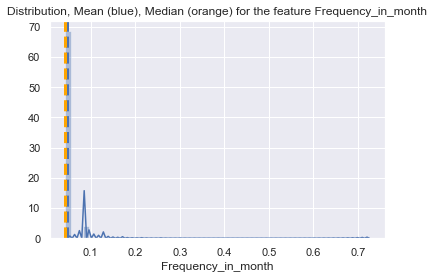

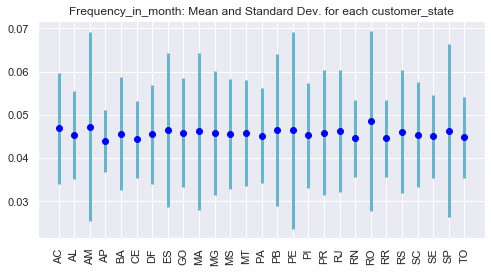

In [65]:
Hist_comp_non_obj_df(data1_simp[['Frequency_in_month']]) 
Mean_std_target_cat(data1_simp,'Frequency_in_month')

**After creating the features 'delivered_purchase_Dtime' and 'estimated_delivered_Dtime' and computing their values for each row, the two new features are concatenate in the clean version of df data6**

In [24]:
data_Dtime = data6_time_features[['delivered_purchase_Dtime','estimated_delivered_Dtime']]
dfmer6_time = pd.concat([data6_simp, data_Dtime]
                        , axis=1
                        , join='inner').drop(columns=['order_delivered_customer_date'
                                                      ,'order_estimated_delivery_date'
                                                      ,'order_purchase_timestamp'])
print(data6_simp.shape)
print(data6_time_features.shape)
print(dfmer6_time.shape)
dfmer6_time.head()

(96455, 5)
(96455, 5)
(96455, 4)


order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

   delivered_purchase_Dtime  estimated_delivered_Dtime  
0                  8.436574                   7.107488  
1                 13.782037                   5.355729  
2                  9.394213                  17.245498  
3                 13.208750                  12.980069  
4                  2.873877                   9.238171

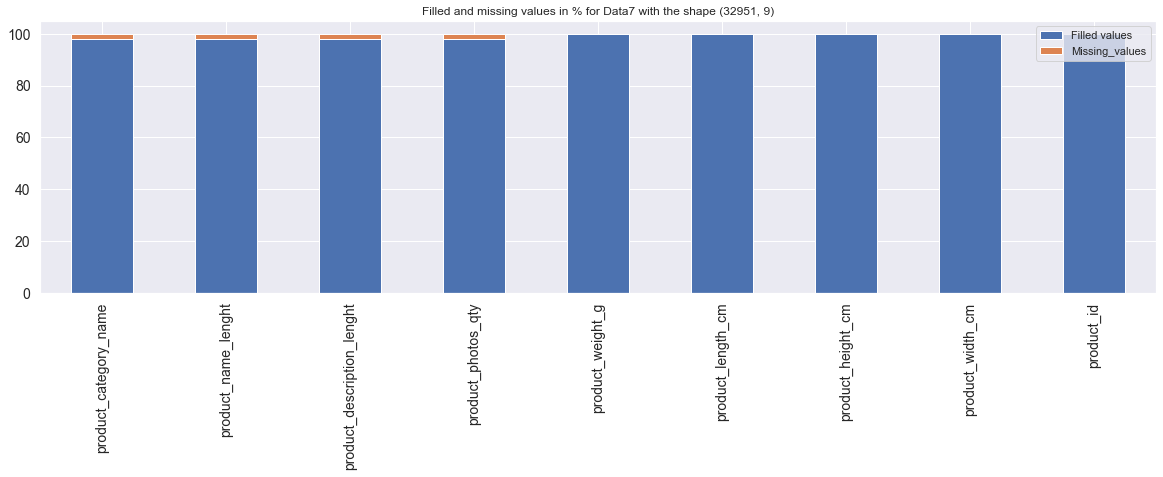

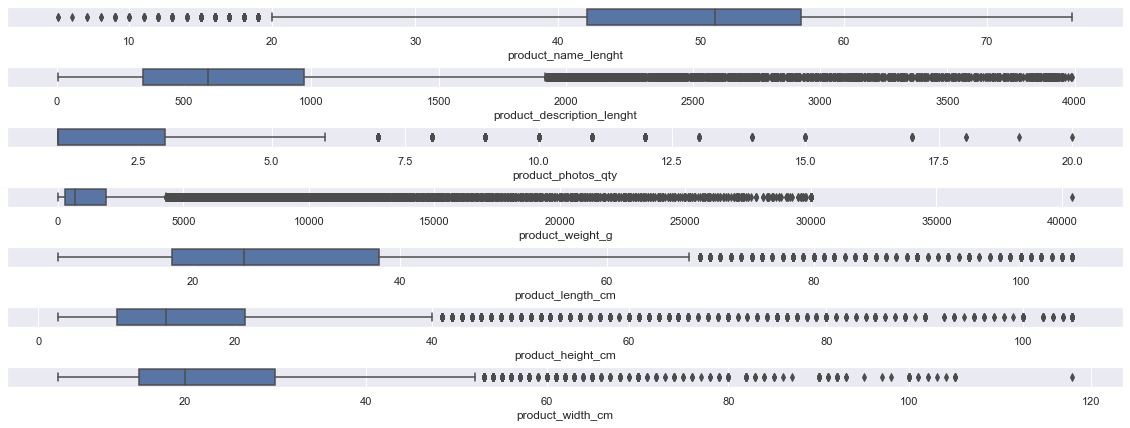

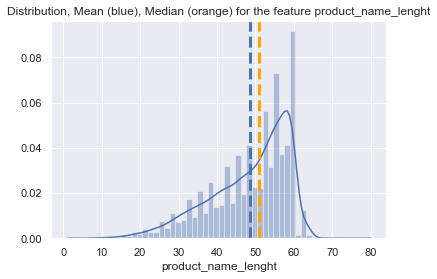

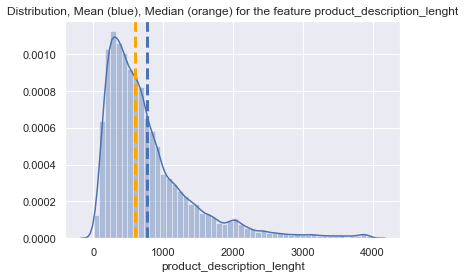

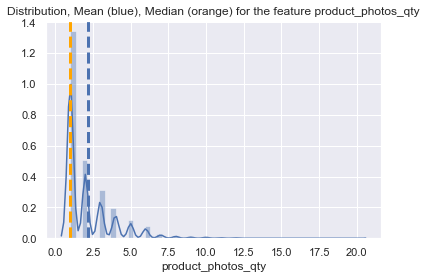

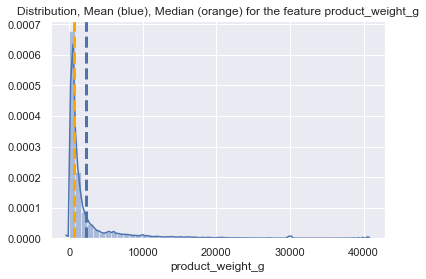

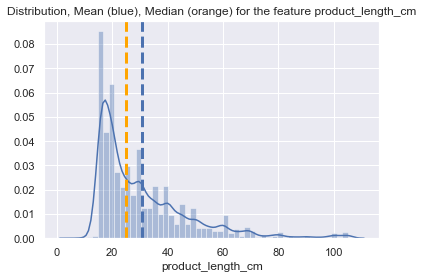

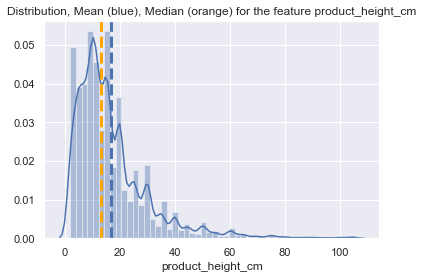

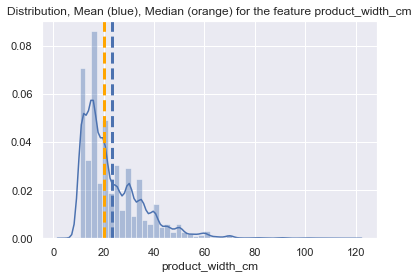

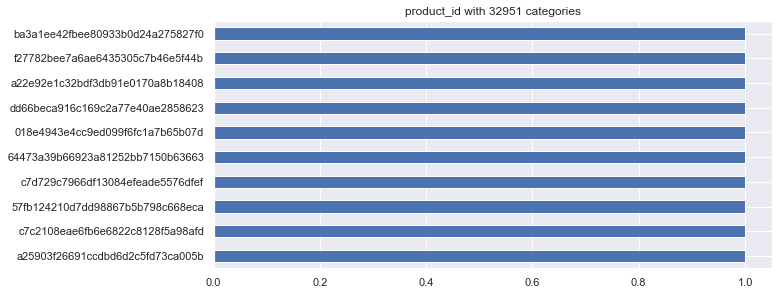

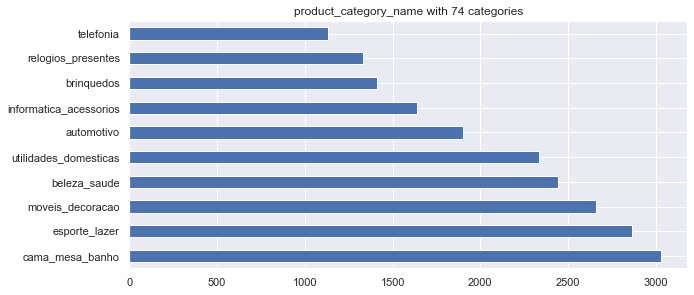

product_id  product_category_name  \
0  1e9e8ef04dbcff4541ed26657ea517e5             perfumaria   
1  3aa071139cb16b67ca9e5dea641aaa2f                  artes   
2  96bd76ec8810374ed1b65e291975717f          esporte_lazer   
3  cef67bcfe19066a932b7673e239eb23d                  bebes   
4  9dc1a7de274444849c219cff195d0b71  utilidades_domesticas   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 40.0                       287.0                 1.0   
1                 44.0                       276.0                 1.0   
2                 46.0                       250.0                 1.0   
3                 27.0                       261.0                 1.0   
4                 37.0                       402.0                 4.0   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  
0             225.0               16.0               10.0              14.0  
1            1000.0               30.0               18.0              20.0  
2             154.0               18.0                9.0              15.0  
3             371.0               26.0                4.0              26.0  
4             625.0               20.0               17.0              13.0

In [42]:
# upload the seventh dataset
data7 = pd.read_csv('olist_products_dataset.csv')
# Perform the full analysis of the dataset
Full_Analysis_df(data7,'Data7')
data7.head()

**Drop rows without values in 'product_category_name','product_name_lenght','product_description_lenght', 'product_photos_qty','product_weight_g','product_length_cm','product_height_cm','product_width_cm'.**

In [43]:
data7_simp = data7.dropna(subset=(['product_category_name',
                                   'product_name_lenght',
                                   'product_description_lenght',
                                   'product_photos_qty',
                                   'product_weight_g',
                                   'product_length_cm',
                                   'product_height_cm',
                                   'product_width_cm']))

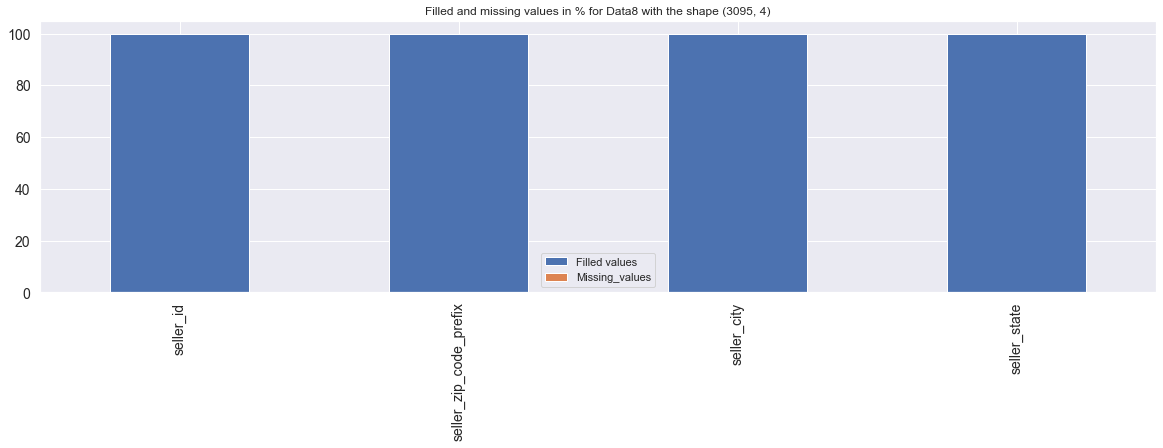

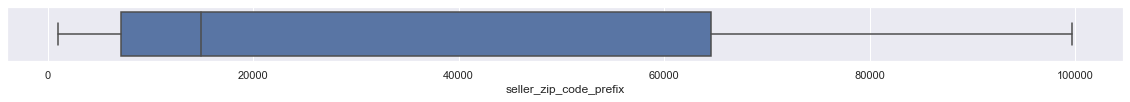

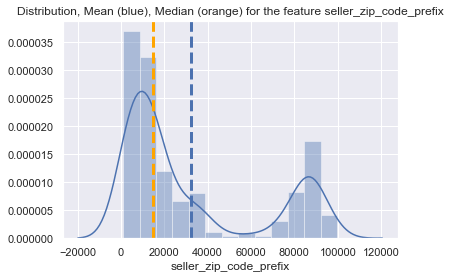

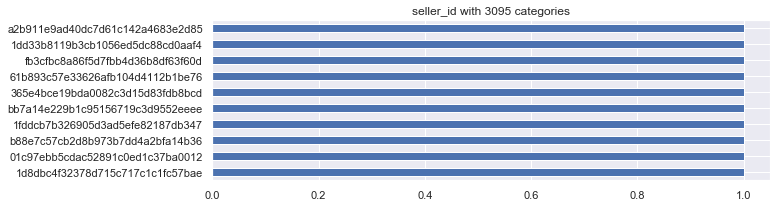

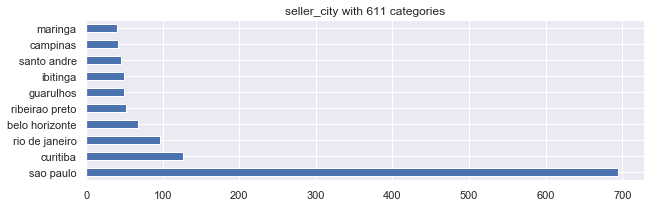

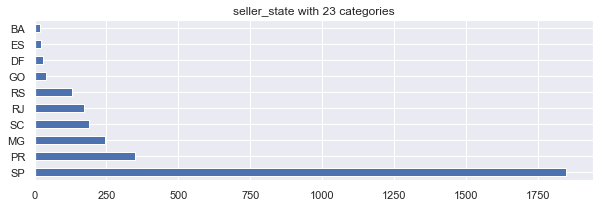

seller_id  seller_zip_code_prefix  \
0  3442f8959a84dea7ee197c632cb2df15                   13023   
1  d1b65fc7debc3361ea86b5f14c68d2e2                   13844   
2  ce3ad9de960102d0677a81f5d0bb7b2d                   20031   
3  c0f3eea2e14555b6faeea3dd58c1b1c3                    4195   
4  51a04a8a6bdcb23deccc82b0b80742cf                   12914   

         seller_city seller_state  
0           campinas           SP  
1         mogi guacu           SP  
2     rio de janeiro           RJ  
3          sao paulo           SP  
4  braganca paulista           SP

In [44]:
# upload the eighth dataset
data8 = pd.read_csv('olist_sellers_dataset.csv')
# Perform a full analysis of the dataset
Full_Analysis_df(data8,'Data8')
data8.head()

**Drop the column with 'seller_zip_code_prefix'**

In [45]:
data8_simp = data8.drop(columns=['seller_zip_code_prefix'])

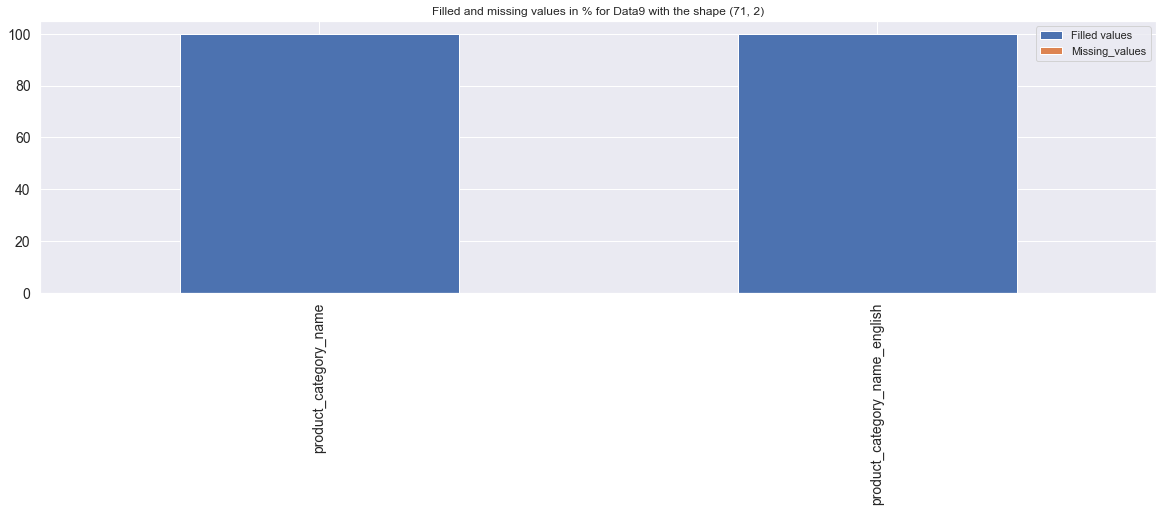

<Figure size 1440x0 with 0 Axes>

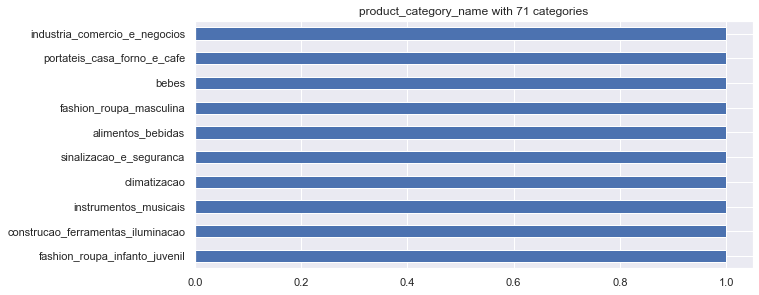

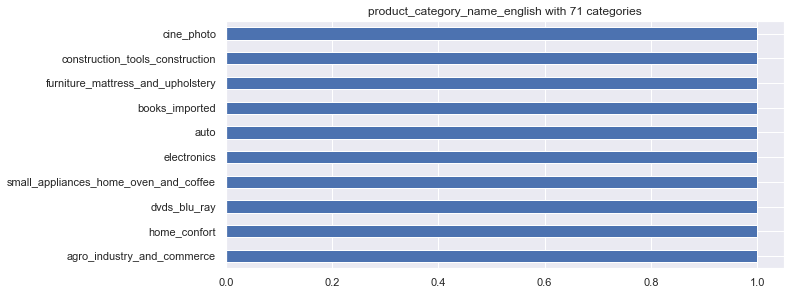

product_category_name product_category_name_english
0            beleza_saude                 health_beauty
1  informatica_acessorios         computers_accessories
2              automotivo                          auto
3         cama_mesa_banho                bed_bath_table
4        moveis_decoracao               furniture_decor

In [46]:
# uploader le fichier du dataset principal en csv
data9 = pd.read_csv('product_category_name_translation.csv')
# Analyse du data set
Full_Analysis_df(data9,'Data9')
data9.head()

**Checking if data9 contains all the 'product_category_name' in English i.e. 'product_category_name_english' .**

In [47]:
df7_todf9 = pd.DataFrame({'product_category_name':data7['product_category_name'].unique()})
dfmer79 = df7_todf9.merge(data9, on=['product_category_name'], how='left')
dfmer79[dfmer79['product_category_name_english'].isnull()]

product_category_name  \
30                                            NaN   
64                                       pc_gamer   
70  portateis_cozinha_e_preparadores_de_alimentos   

   product_category_name_english  
30                           NaN  
64                           NaN  
70                           NaN

**It reveals 'product_category_name' missed two unique values: pc_gamer and portateis_cozinha_e_preparadores_de_alimentos. Proper translations for these two unique values are  entered manually as 'pc_gamer' and 'portable_kitchen_and_food_preparers'.**

In [48]:
dfmer79.loc[dfmer79['product_category_name'] == 'pc_gamer', 'product_category_name_english'] = 'pc_gamer'
dfmer79.loc[dfmer79['product_category_name'] 
            == 'portateis_cozinha_e_preparadores_de_alimentos', 'product_category_name_english'] = 'portable_kitchen_and_food_preparers'
data9_new = dfmer79.dropna()
data9_new.head()

product_category_name product_category_name_english
0             perfumaria                     perfumery
1                  artes                           art
2          esporte_lazer                sports_leisure
3                  bebes                          baby
4  utilidades_domesticas                    housewares

**Merging data7 and data9 and removing the column 'product_category_name' containing the portuguese item names.**

In [49]:
dfmer7_9 = pd.merge(data7_simp
                    , data9_new
                    , how='inner'
                    , on = ['product_category_name']).drop(columns='product_category_name')
print(data7_simp.shape)
print(data9.shape)
print(dfmer7_9.shape)
dfmer7_9.head()

(32340, 9)
(71, 2)
(32340, 9)


product_id  product_name_lenght  \
0  1e9e8ef04dbcff4541ed26657ea517e5                 40.0   
1  6a2fb4dd53d2cdb88e0432f1284a004c                 39.0   
2  0d009643171aee696f4733340bc2fdd0                 52.0   
3  b1eae565a61935e0011ee7682fef9dc9                 49.0   
4  8da90b37f0fb171b4877c124f965b1f6                 56.0   

   product_description_lenght  product_photos_qty  product_weight_g  \
0                       287.0                 1.0             225.0   
1                       346.0                 2.0             400.0   
2                       150.0                 1.0             422.0   
3                       460.0                 2.0             267.0   
4                       733.0                 3.0             377.0   

   product_length_cm  product_height_cm  product_width_cm  \
0               16.0               10.0              14.0   
1               27.0                5.0              20.0   
2               21.0               16.0              18.0   
3               17.0               13.0              17.0   
4               18.0               13.0              15.0   

  product_category_name_english  
0                     perfumery  
1                     perfumery  
2                     perfumery  
3                     perfumery  
4                     perfumery

**Checking potential correlations between the features.**

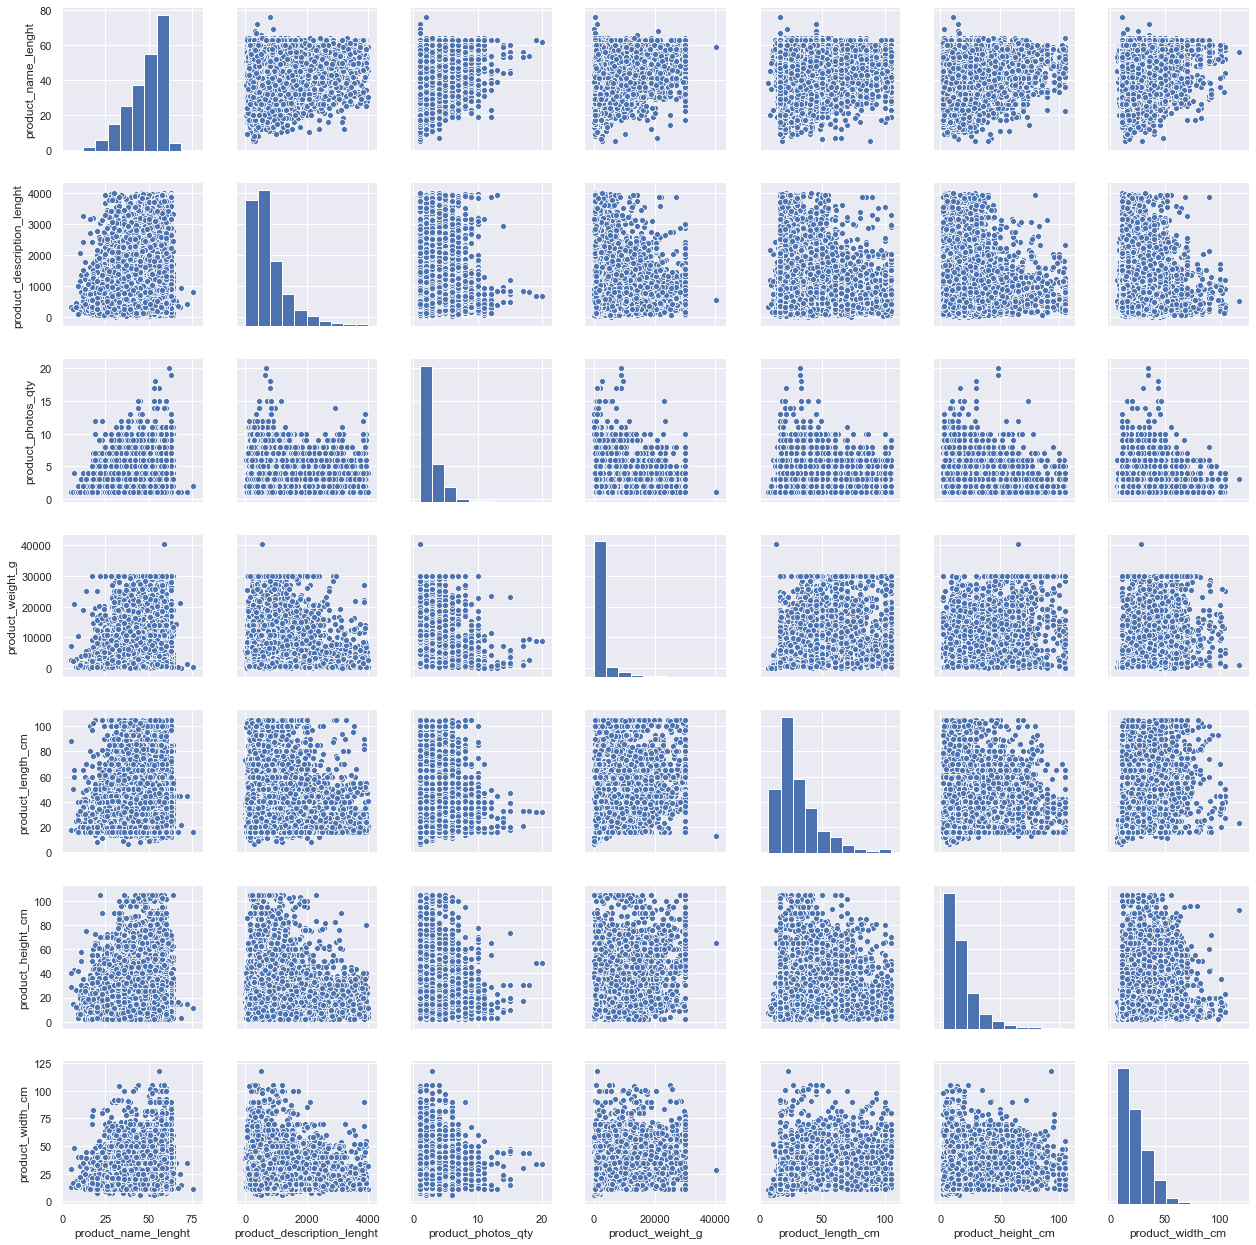

In [55]:
dfmer7_9_temp = dfmer7_9.drop(columns=['product_id','product_category_name_english'])
pp_dfmer7_9 = sns.pairplot(dfmer7_9_temp)

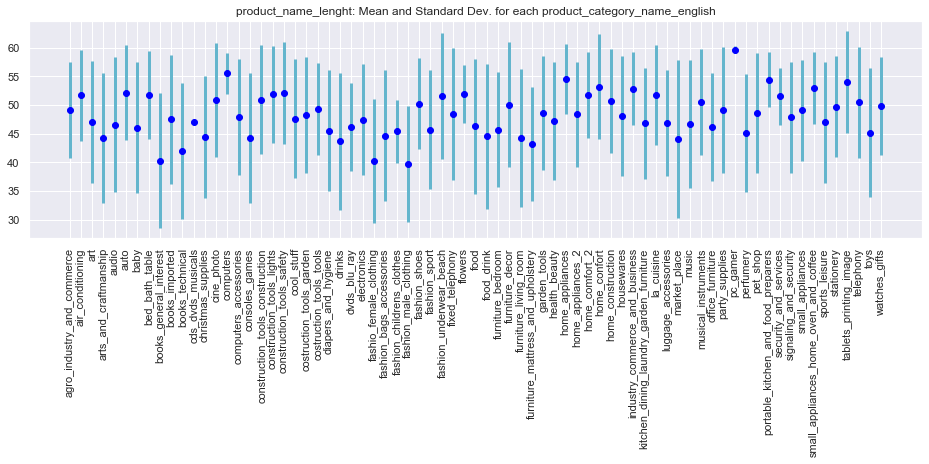

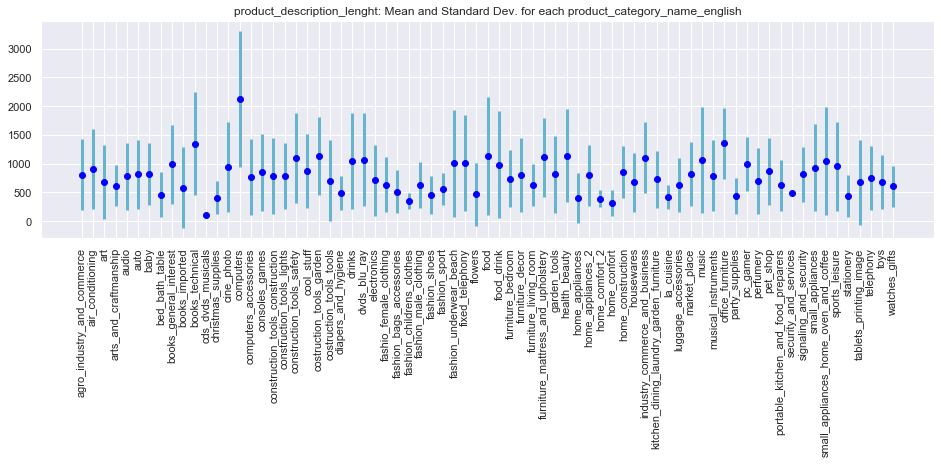

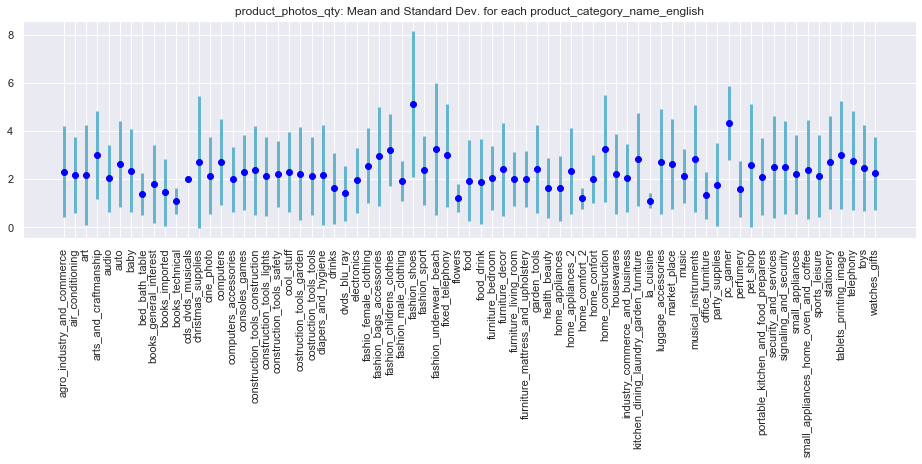

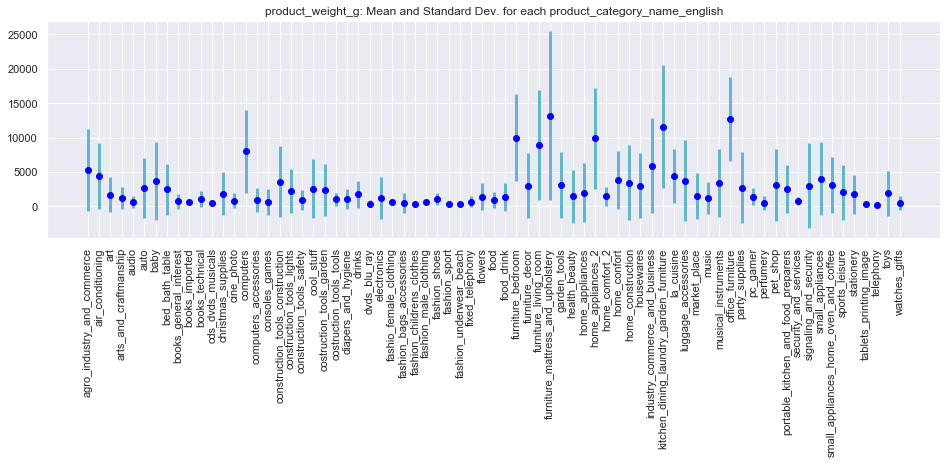

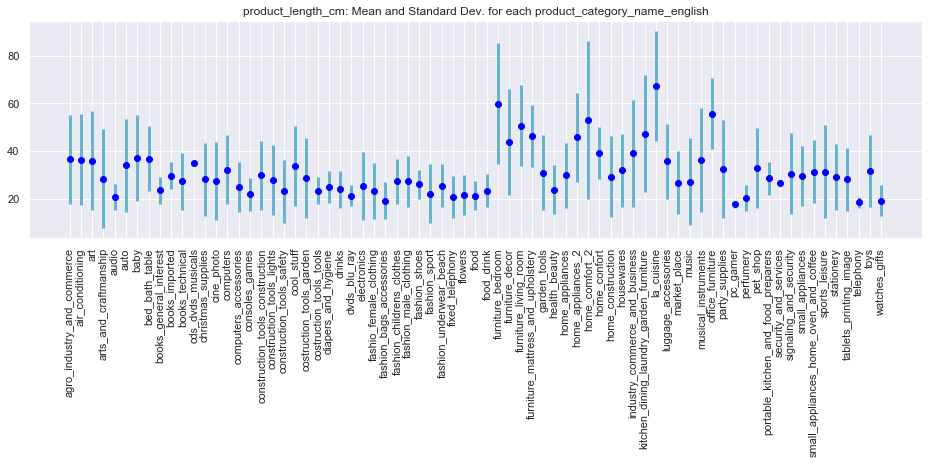

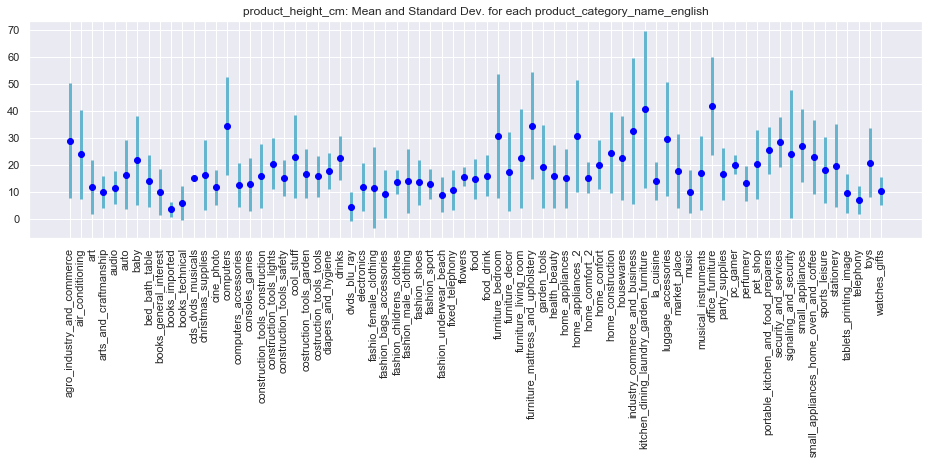

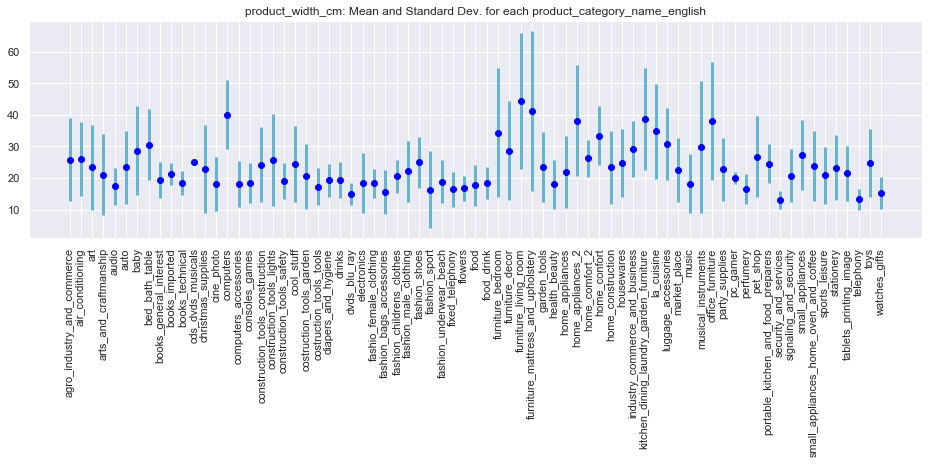

In [61]:
Mean_std_target_cat(dfmer7_9,'product_name_lenght',80,16)
Mean_std_target_cat(dfmer7_9,'product_description_lenght',80,16)
Mean_std_target_cat(dfmer7_9,'product_photos_qty',80,16)
Mean_std_target_cat(dfmer7_9,'product_weight_g',80,16)
Mean_std_target_cat(dfmer7_9,'product_length_cm',80,16)
Mean_std_target_cat(dfmer7_9,'product_height_cm',80,16)
Mean_std_target_cat(dfmer7_9,'product_width_cm',80,16)

**Merging data2 and data1  on 'customer_zip_code_prefix' and droping this feature column.**

In [63]:
dfmer2_1 = pd.merge(data1_simp,data2_grp_review, how ='inner', on=['customer_zip_code_prefix']).drop(columns='customer_zip_code_prefix')
print(data1_simp.shape)
print(data2_grp_review.shape)
print(dfmer2_1.shape)
dfmer2_1.head()
#Full_Analysis_df(dfmer2_1,'dfmer2_1')

(99441, 5)
(19015, 3)
(99163, 6)


customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  5dca924cc99eea2dc5ba40d11ec5dd0f  2761fee7f378f0a8d7682d8a3fa07ab1   
2  661897d4968f1b59bfff74c7eb2eb4fc  d06a495406b79cb8203ea21cc0942f8c   
3  702b62324327ccba20f1be3465426437  8b3d988f330c1d1c3332ccd440c147b7   
4  bdf997bae7ca819b0415f5174d6b4302  866755e25db620f8d7e81b351a15bb2f   

  customer_state  Frequency_in_month  geolocation_lat  geolocation_lng  
0             SP            0.042682       -20.498489       -47.396929  
1             SP            0.042682       -20.498489       -47.396929  
2             SP            0.042682       -20.498489       -47.396929  
3             SP            0.042682       -20.498489       -47.396929  
4             SP            0.042682       -20.498489       -47.396929

**Merged df based on data2 and data1 is now merged with data6 on the feature 'customer_id'.**

In [66]:
dfmer6_2_1 = pd.merge(dfmer6_time,dfmer2_1, how ='inner', on=['customer_id'])
print(dfmer6_time.shape)
print(dfmer2_1.shape)
print(dfmer6_2_1.shape)
dfmer6_2_1.head()

(96455, 4)
(99163, 6)
(96191, 9)


order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

   delivered_purchase_Dtime  estimated_delivered_Dtime  \
0                  8.436574                   7.107488   
1                 13.782037                   5.355729   
2                  9.394213                  17.245498   
3                 13.208750                  12.980069   
4                  2.873877                   9.238171   

                 customer_unique_id customer_state  Frequency_in_month  \
0  7c396fd4830fd04220f754e42b4e5bff             SP            0.085363   
1  af07308b275d755c9edb36a90c618231             BA            0.042682   
2  3a653a41f6f9fc3d2a113cf8398680e8             GO            0.042682   
3  7c142cf63193a1473d2e66489a9ae977             RN            0.042682   
4  72632f0f9dd73dfee390c9b22eb56dd6             SP            0.042682   

   geolocation_lat  geolocation_lng  
0       -23.576983       -46.587161  
1       -12.177924       -44.660711  
2       -16.745150       -48.514783  
3        -5.774190       -35.271143  
4       -23.676370       -46.514627

**Cheking potential correlation between 'Frequency_in_month' and features in the dataframe dfmer6_2_1.**

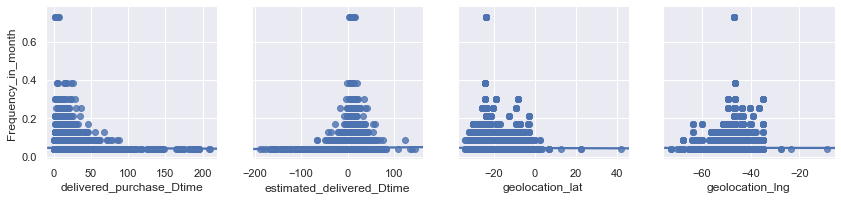

In [67]:
Target_Nobj_pairpl(dfmer6_2_1,'Frequency_in_month')

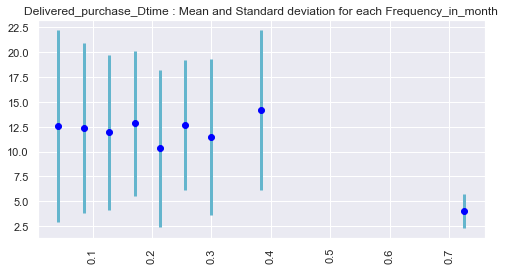

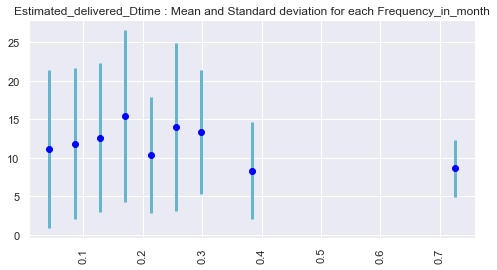

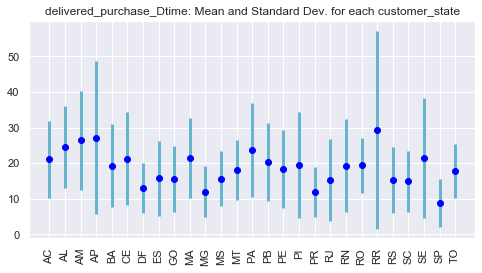

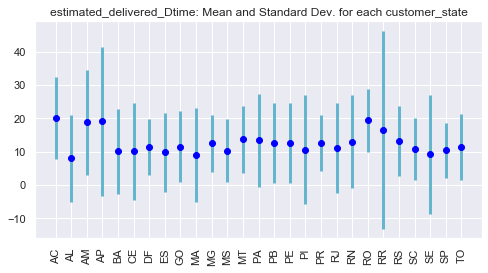

In [70]:
mean_frq_del_purch =dfmer6_2_1[['Frequency_in_month','delivered_purchase_Dtime']].groupby('Frequency_in_month').mean() 
std_frq_del_purch =dfmer6_2_1[['Frequency_in_month','delivered_purchase_Dtime']].groupby('Frequency_in_month').std()

plt.figure(figsize=(8, 4))
plt.errorbar(mean_frq_del_purch.index, mean_frq_del_purch['delivered_purchase_Dtime'],
             std_frq_del_purch['delivered_purchase_Dtime'], 
             fmt='o', color='blue',ecolor='c', elinewidth=3, capsize=0)
plt.xticks(rotation=90)
plt.title('Delivered_purchase_Dtime : Mean and Standard deviation for each Frequency_in_month')
plt.show()

mean_frq_estim_del =dfmer6_2_1[['Frequency_in_month','estimated_delivered_Dtime']].groupby('Frequency_in_month').mean() 
std_frq_estim_del =dfmer6_2_1[['Frequency_in_month','estimated_delivered_Dtime']].groupby('Frequency_in_month').std()

plt.figure(figsize=(8, 4))
plt.errorbar(mean_frq_estim_del.index, mean_frq_estim_del['estimated_delivered_Dtime'],
             std_frq_estim_del['estimated_delivered_Dtime'], 
             fmt='o', color='blue',ecolor='c', elinewidth=3, capsize=0)
plt.xticks(rotation=90)
plt.title('Estimated_delivered_Dtime : Mean and Standard deviation for each Frequency_in_month')
plt.show()

Mean_std_target_cat(dfmer6_2_1,'delivered_purchase_Dtime')
Mean_std_target_cat(dfmer6_2_1,'estimated_delivered_Dtime')

**Merged df based on data6, data2 and data1 is now merged with data5 on the feature 'order_id'**

In [71]:
dfmer5_6_2_1 = pd.merge(dfmer6_2_1, data5_grp_review, how ='inner', on=['order_id'])
print(dfmer6_2_1.shape)
print(data5_grp_review.shape)
print(dfmer5_6_2_1.shape)

dfmer5_6_2_1.head()

(96191, 9)
(99441, 2)
(96191, 10)


order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

   delivered_purchase_Dtime  estimated_delivered_Dtime  \
0                  8.436574                   7.107488   
1                 13.782037                   5.355729   
2                  9.394213                  17.245498   
3                 13.208750                  12.980069   
4                  2.873877                   9.238171   

                 customer_unique_id customer_state  Frequency_in_month  \
0  7c396fd4830fd04220f754e42b4e5bff             SP            0.085363   
1  af07308b275d755c9edb36a90c618231             BA            0.042682   
2  3a653a41f6f9fc3d2a113cf8398680e8             GO            0.042682   
3  7c142cf63193a1473d2e66489a9ae977             RN            0.042682   
4  72632f0f9dd73dfee390c9b22eb56dd6             SP            0.042682   

   geolocation_lat  geolocation_lng  review_score  
0       -23.576983       -46.587161           4.0  
1       -12.177924       -44.660711           4.0  
2       -16.745150       -48.514783           5.0  
3        -5.774190       -35.271143           5.0  
4       -23.676370       -46.514627           5.0

**Checking the potential correlation between the 'review_score' and the 'customer_state'.**

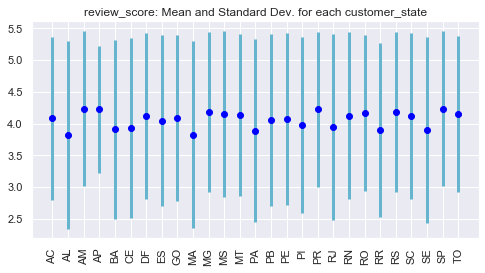

In [72]:
Mean_std_target_cat(dfmer5_6_2_1,'review_score')

**Merged df based on data7 and data9 is now merged with data3 on the feature 'product_id'**

In [75]:
dfmer3_7_9 = pd.merge(data3_simp,dfmer7_9, how ='inner', on=['product_id'])
print(data3_simp.shape)
print(dfmer7_9.shape)
print(dfmer3_7_9.shape)
#missing values in features
print("\n --- Valeurs manquantes dans le df ---", "\n\n", pd.isnull(dfmer3_7_9).sum(), "\n") 

dfmer3_7_9.head()

(112650, 5)
(32340, 9)
(111046, 13)

 --- Valeurs manquantes dans le df --- 

 order_id                         0
order_item_id                    0
product_id                       0
price                            0
freight_value                    0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
product_category_name_english    0
dtype: int64 



order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  130898c0987d1801452a8ed92a670612              1   
2  532ed5e14e24ae1f0d735b91524b98b9              1   
3  6f8c31653edb8c83e1a739408b5ff750              1   
4  7d19f4ef4d04461989632411b7e588b9              1   

                         product_id  price  freight_value  \
0  4244733e06e7ecb4970a6e2683c13e61   58.9          13.29   
1  4244733e06e7ecb4970a6e2683c13e61   55.9          17.96   
2  4244733e06e7ecb4970a6e2683c13e61   64.9          18.33   
3  4244733e06e7ecb4970a6e2683c13e61   58.9          16.17   
4  4244733e06e7ecb4970a6e2683c13e61   58.9          13.29   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 58.0                       598.0                 4.0   
1                 58.0                       598.0                 4.0   
2                 58.0                       598.0                 4.0   
3                 58.0                       598.0                 4.0   
4                 58.0                       598.0                 4.0   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  \
0             650.0               28.0                9.0              14.0   
1             650.0               28.0                9.0              14.0   
2             650.0               28.0                9.0              14.0   
3             650.0               28.0                9.0              14.0   
4             650.0               28.0                9.0              14.0   

  product_category_name_english  
0                    cool_stuff  
1                    cool_stuff  
2                    cool_stuff  
3                    cool_stuff  
4                    cool_stuff

**Checking the relationships of 'price', 'freight_value' and 'order_item_id' to the 'product_category_name_english'.**

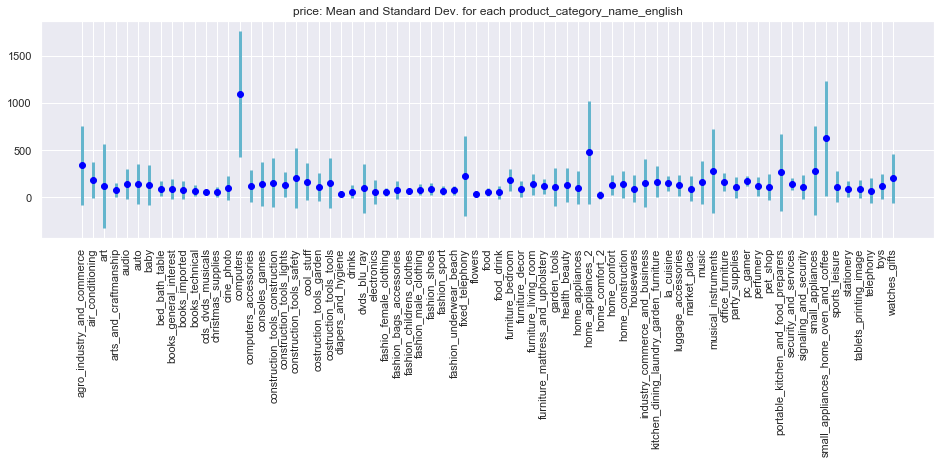

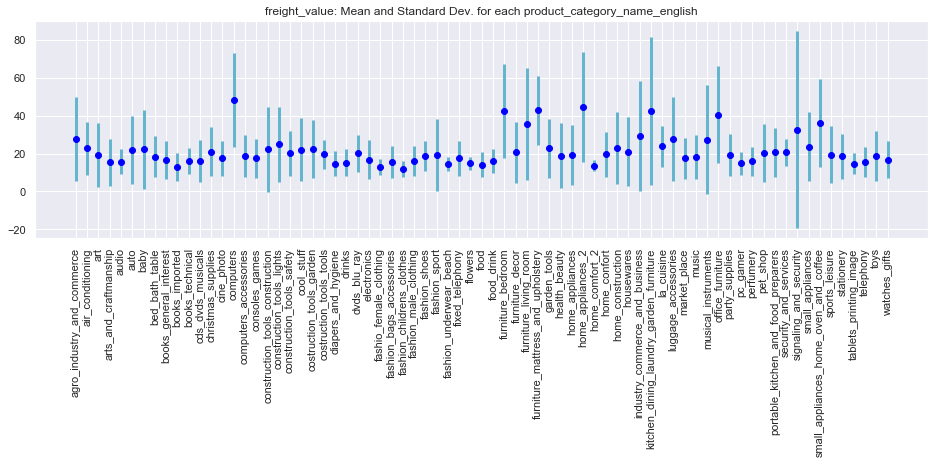

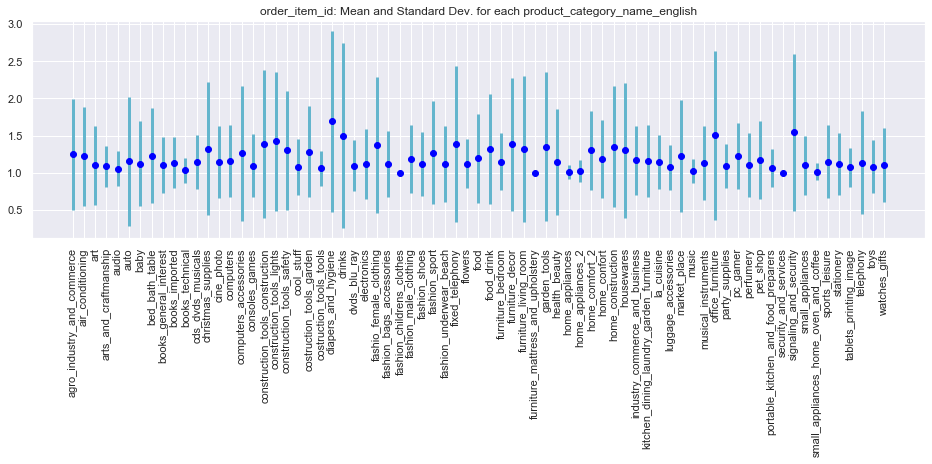

In [77]:
Mean_std_target_cat(dfmer3_7_9,'price',80,16)
Mean_std_target_cat(dfmer3_7_9,'freight_value',80,16)
Mean_std_target_cat(dfmer3_7_9,'order_item_id',80,16)

**Merged df based on data3, data7 and data9 is now merged with data4 on the feature 'order_id'.**

In [78]:
dfmer4_3_7_9 = pd.merge(data4_simp,dfmer3_7_9, how ='inner', on=['order_id'])
print(data4_simp.shape)
print(dfmer3_7_9.shape)
print(dfmer4_3_7_9.shape)

#missing values in features
print("\n --- Valeurs manquantes dans le df ---", "\n\n", pd.isnull(dfmer4_3_7_9).sum(), "\n") 

dfmer4_3_7_9.head()

(103883, 5)
(111046, 13)
(115902, 17)

 --- Valeurs manquantes dans le df --- 

 order_id                         0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
order_item_id                    0
product_id                       0
price                            0
freight_value                    0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
product_category_name_english    0
dtype: int64 



order_id  payment_sequential payment_type  \
0  b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1  a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2  25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   
3  ba78997921bbcdc1373bb41e913ab953                   1  credit_card   
4  42fdf880ba16b47b59251dd489d4441a                   1  credit_card   

   payment_installments  payment_value  order_item_id  \
0                     8          99.33              1   
1                     1          24.39              1   
2                     1          65.71              1   
3                     8         107.78              1   
4                     2         128.45              1   

                         product_id   price  freight_value  \
0  af74cc53dcffc8384b29e7abfa41902b   79.80          19.53   
1  a630cc320a8c872f9de830cf121661a3   17.00           7.39   
2  2028bf1b01cafb2d2b1901fca4083222   56.99           8.72   
3  548e5bfe28edceab6b51fa707cc9556f   89.90          17.88   
4  386486367c1f9d4f587a8864ccb6902b  113.57          14.88   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 57.0                       921.0                 8.0   
1                 59.0                      1274.0                 2.0   
2                 54.0                      1536.0                 2.0   
3                 60.0                       188.0                 1.0   
4                 54.0                       120.0                 1.0   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  \
0             800.0               17.0               27.0              17.0   
1             150.0               16.0                6.0              11.0   
2             250.0               20.0                8.0              21.0   
3            1200.0               44.0                2.0              35.0   
4             835.0               40.0                9.0              33.0   

  product_category_name_english  
0             home_construction  
1                          auto  
2                     perfumery  
3                bed_bath_table  
4                bed_bath_table

**Again checking potential relationships between features**

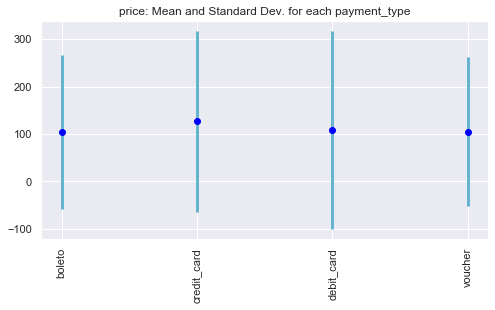

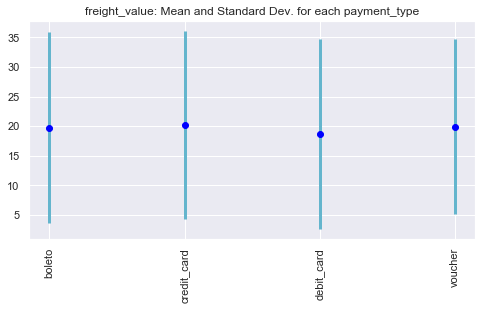

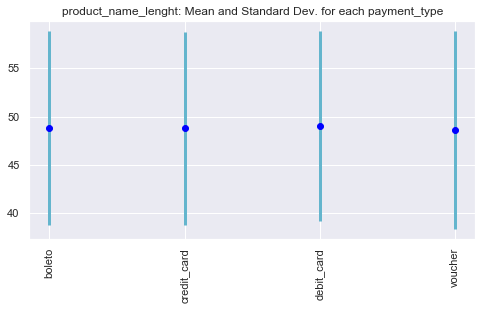

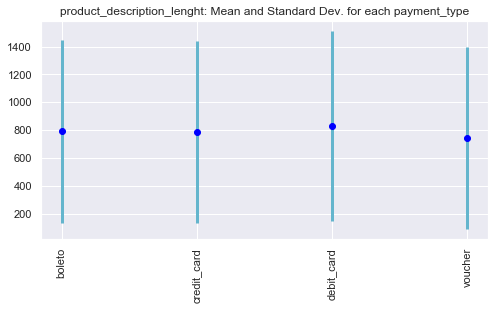

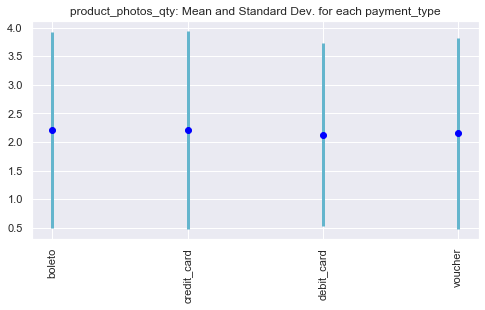

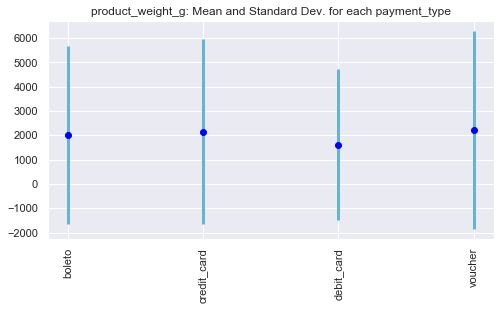

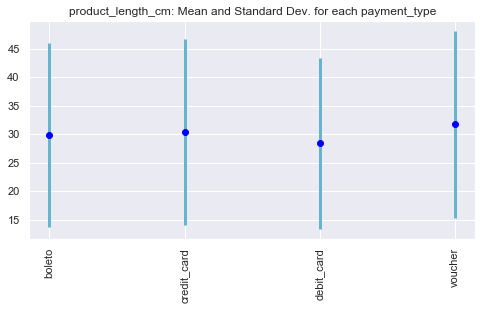

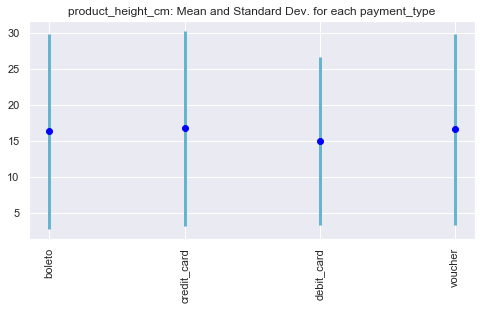

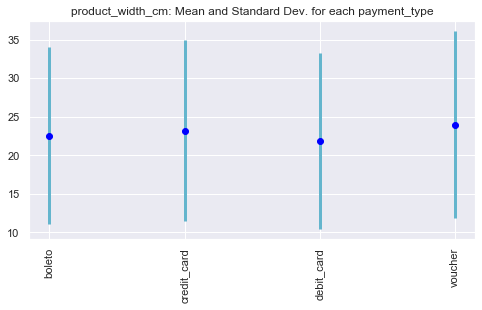

In [79]:
Mean_std_target_cat(dfmer4_3_7_9,'price')
Mean_std_target_cat(dfmer4_3_7_9,'freight_value')
Mean_std_target_cat(dfmer4_3_7_9,'product_name_lenght')
Mean_std_target_cat(dfmer4_3_7_9,'product_description_lenght')
Mean_std_target_cat(dfmer4_3_7_9,'product_photos_qty')
Mean_std_target_cat(dfmer4_3_7_9,'product_weight_g')
Mean_std_target_cat(dfmer4_3_7_9,'product_length_cm')
Mean_std_target_cat(dfmer4_3_7_9,'product_height_cm')
Mean_std_target_cat(dfmer4_3_7_9,'product_width_cm')

**Full merge on the feature 'order_id'**

In [80]:
dfmer5_6_2_1_4_3_7_9 = pd.merge(dfmer4_3_7_9, dfmer5_6_2_1, how ='inner', on=['order_id'])
print(dfmer5_6_2_1.shape)
print(dfmer4_3_7_9.shape)
print(dfmer5_6_2_1_4_3_7_9.shape)

#checking missing values in the features
print("\n --- Valeurs manquantes dans le df ---", "\n\n", pd.isnull(dfmer5_6_2_1_4_3_7_9).sum(), "\n") 

dfmer5_6_2_1_4_3_7_9.head()

(96191, 10)
(115902, 17)
(113090, 26)

 --- Valeurs manquantes dans le df --- 

 order_id                         0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
order_item_id                    0
product_id                       0
price                            0
freight_value                    0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
product_category_name_english    0
customer_id                      0
delivered_purchase_Dtime         0
estimated_delivered_Dtime        0
customer_unique_id               0
customer_state                   0
Frequency_in_month               0
geolocation_lat                  0
geolocation_lng                  0
review_score                     0
dtype: in

order_id  payment_sequential payment_type  \
0  b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1  a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2  25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   
3  ba78997921bbcdc1373bb41e913ab953                   1  credit_card   
4  42fdf880ba16b47b59251dd489d4441a                   1  credit_card   

   payment_installments  payment_value  order_item_id  \
0                     8          99.33              1   
1                     1          24.39              1   
2                     1          65.71              1   
3                     8         107.78              1   
4                     2         128.45              1   

                         product_id   price  freight_value  \
0  af74cc53dcffc8384b29e7abfa41902b   79.80          19.53   
1  a630cc320a8c872f9de830cf121661a3   17.00           7.39   
2  2028bf1b01cafb2d2b1901fca4083222   56.99           8.72   
3  548e5bfe28edceab6b51fa707cc9556f   89.90          17.88   
4  386486367c1f9d4f587a8864ccb6902b  113.57          14.88   

   product_name_lenght  ...  product_category_name_english  \
0                 57.0  ...              home_construction   
1                 59.0  ...                           auto   
2                 54.0  ...                      perfumery   
3                 60.0  ...                 bed_bath_table   
4                 54.0  ...                 bed_bath_table   

                        customer_id  delivered_purchase_Dtime  \
0  0a8556ac6be836b46b3e89920d59291c                 13.815995   
1  f2c7fc58a9de810828715166c672f10a                  3.396192   
2  25b14b69de0b6e184ae6fe2755e478f9                  6.253310   
3  7a5d8efaaa1081f800628c30d2b0728f                 14.563715   
4  15fd6fb8f8312dbb4674e4518d6fa3b3                 11.323333   

   estimated_delivered_Dtime                customer_unique_id  \
0                  12.266076  708ab75d2a007f0564aedd11139c7708   
1                  16.144340  a8b9d3a27068454b1c98cc67d4e31e6f   
2                  16.274525  6f70c0b2f7552832ba46eb57b1c5651e   
3                  13.933438  87695ed086ebd36f20404c82d20fca87   
4                  11.093831  4291db0da71914754618cd789aebcd56   

   customer_state Frequency_in_month geolocation_lat  geolocation_lng  \
0              MG           0.042682      -17.858065       -41.495279   
1              SP           0.042682      -23.471749       -46.636773   
2              SP           0.042682      -23.457636       -46.656681   
3              MG           0.042682      -21.741553       -43.335326   
4              SP           0.085363      -23.019107       -48.010925   

   review_score  
0           1.0  
1           5.0  
2           5.0  
3           5.0  
4           5.0  

[5 rows x 26 columns]

**Drop columns named 'order_id','product_id', place the column named 'customer_id'as the first column of the df and check if all columns in the full merged df are filled.**

customer_id  payment_sequential payment_type  \
0  0a8556ac6be836b46b3e89920d59291c                   1  credit_card   
1  f2c7fc58a9de810828715166c672f10a                   1  credit_card   
2  25b14b69de0b6e184ae6fe2755e478f9                   1  credit_card   
3  7a5d8efaaa1081f800628c30d2b0728f                   1  credit_card   
4  15fd6fb8f8312dbb4674e4518d6fa3b3                   1  credit_card   

   payment_installments  payment_value  order_item_id   price  freight_value  \
0                     8          99.33              1   79.80          19.53   
1                     1          24.39              1   17.00           7.39   
2                     1          65.71              1   56.99           8.72   
3                     8         107.78              1   89.90          17.88   
4                     2         128.45              1  113.57          14.88   

   product_name_lenght  product_description_lenght  ...  product_width_cm  \
0                 57.0                       921.0  ...              17.0   
1                 59.0                      1274.0  ...              11.0   
2                 54.0                      1536.0  ...              21.0   
3                 60.0                       188.0  ...              35.0   
4                 54.0                       120.0  ...              33.0   

   product_category_name_english  delivered_purchase_Dtime  \
0              home_construction                 13.815995   
1                           auto                  3.396192   
2                      perfumery                  6.253310   
3                 bed_bath_table                 14.563715   
4                 bed_bath_table                 11.323333   

   estimated_delivered_Dtime                customer_unique_id customer_state  \
0                  12.266076  708ab75d2a007f0564aedd11139c7708             MG   
1                  16.144340  a8b9d3a27068454b1c98cc67d4e31e6f             SP   
2                  16.274525  6f70c0b2f7552832ba46eb57b1c5651e             SP   
3                  13.933438  87695ed086ebd36f20404c82d20fca87             MG   
4                  11.093831  4291db0da71914754618cd789aebcd56             SP   

   Frequency_in_month  geolocation_lat geolocation_lng review_score  
0            0.042682       -17.858065      -41.495279          1.0  
1            0.042682       -23.471749      -46.636773          5.0  
2            0.042682       -23.457636      -46.656681          5.0  
3            0.042682       -21.741553      -43.335326          5.0  
4            0.085363       -23.019107      -48.010925          5.0  

[5 rows x 24 columns]

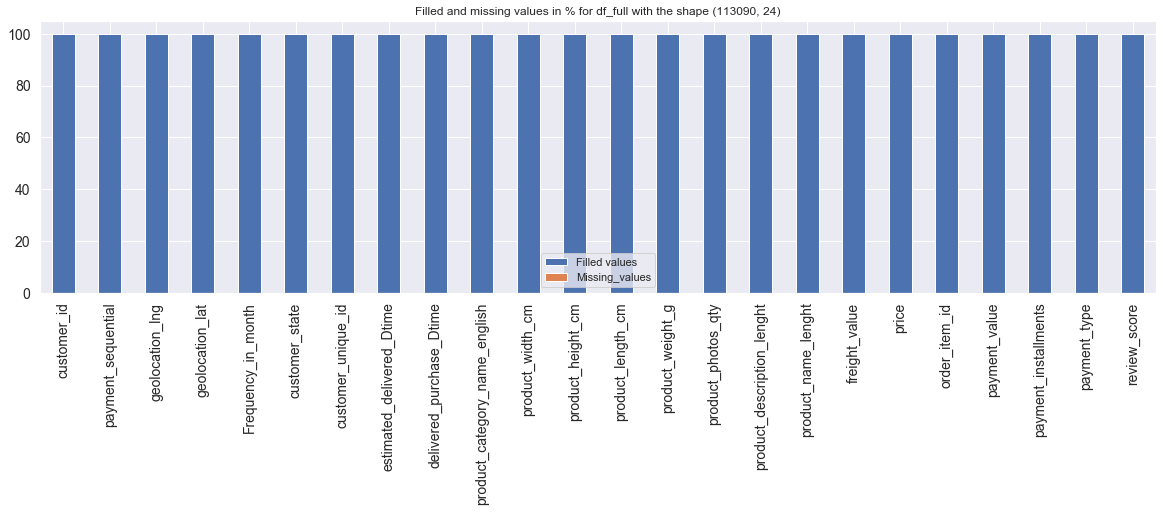

In [81]:
df_full = dfmer5_6_2_1_4_3_7_9.drop(columns=['order_id','product_id'])
col = df_full.pop('customer_id')
df_full.insert(0, col.name, col)
Meta_df(df_full,'df_full')
df_full.head()

**Final checks for correlations before saving the the full merged dataframe.**

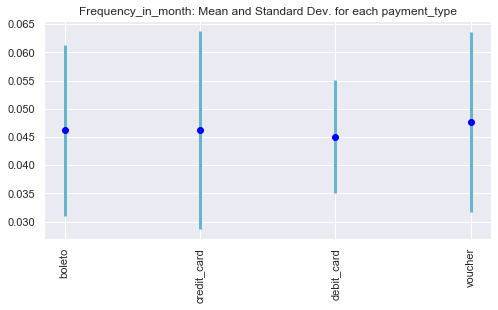

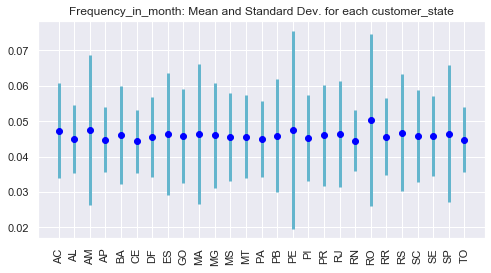

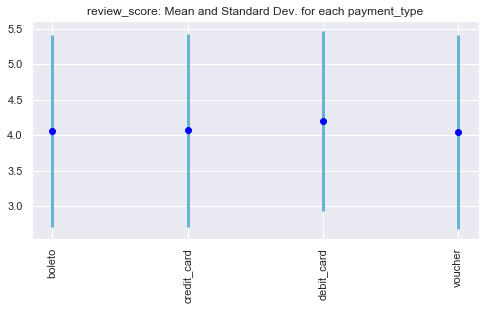

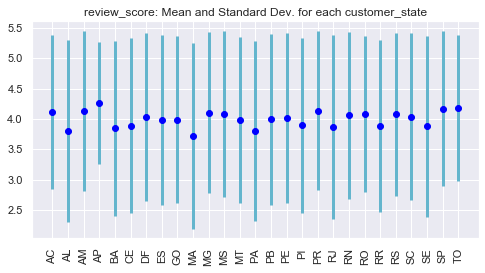

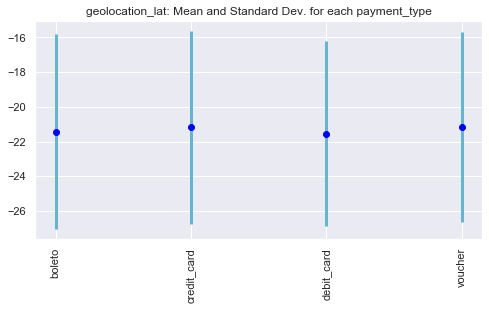

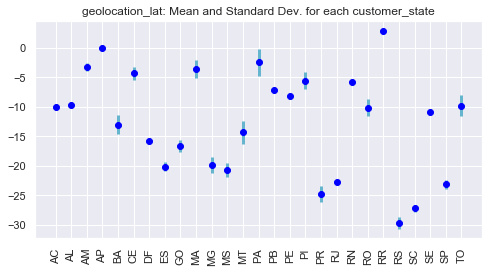

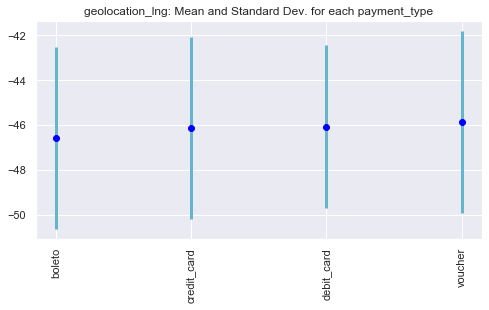

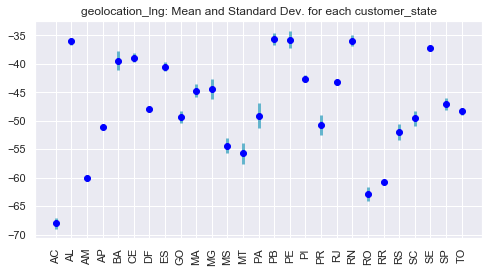

In [85]:
Mean_std_target_cat(df_full,'Frequency_in_month')
Mean_std_target_cat(df_full,'review_score')
Mean_std_target_cat(df_full,'geolocation_lat')
Mean_std_target_cat(df_full,'geolocation_lng')

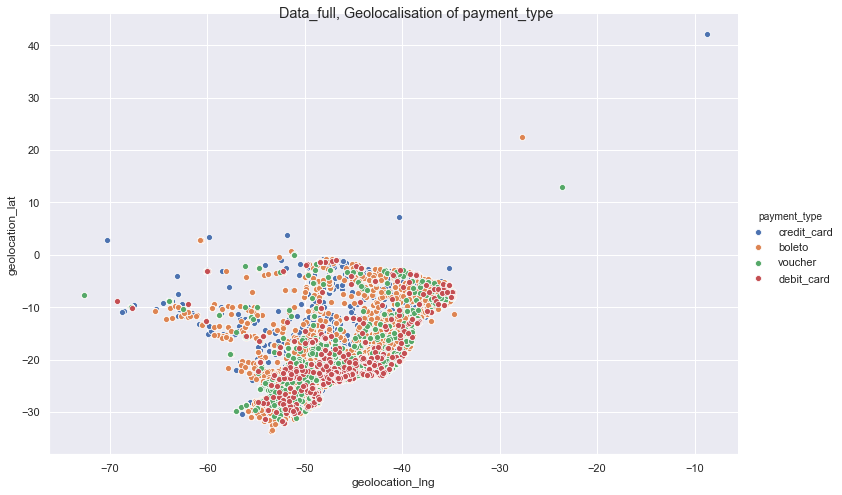

In [84]:
geo_pay_typ = sns.pairplot(data = df_full,
                           y_vars=['geolocation_lat'],
                           x_vars=['geolocation_lng'], 
                           hue='payment_type', 
                           height = 7, 
                           aspect=1.5)
geo_pay_typ.fig.suptitle("Data_full, Geolocalisation of payment_type")
plt.show()

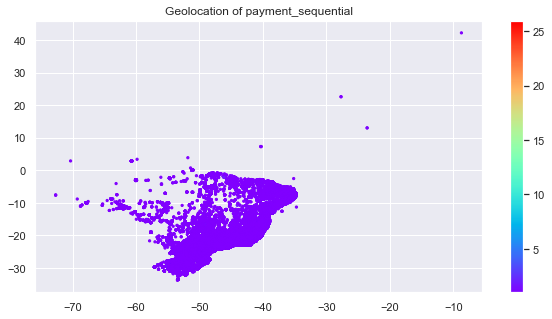

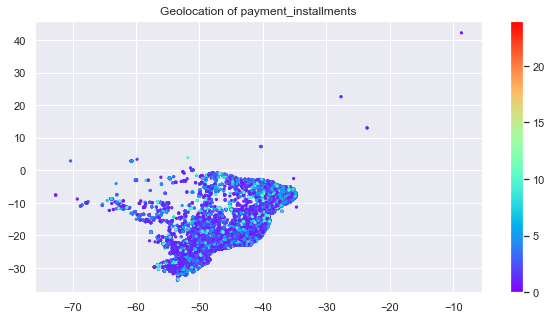

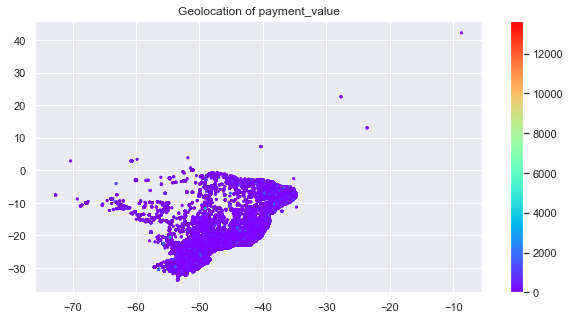

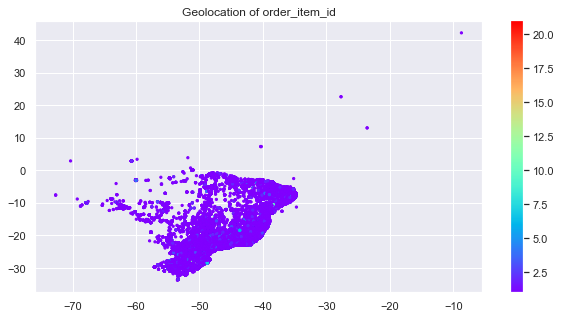

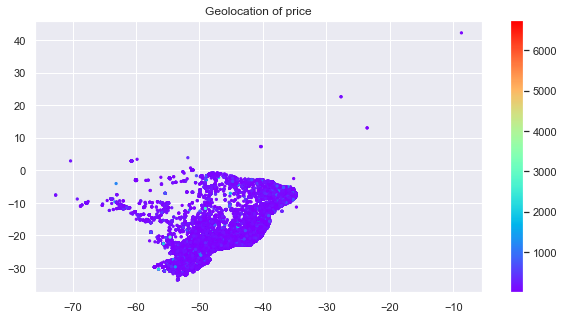

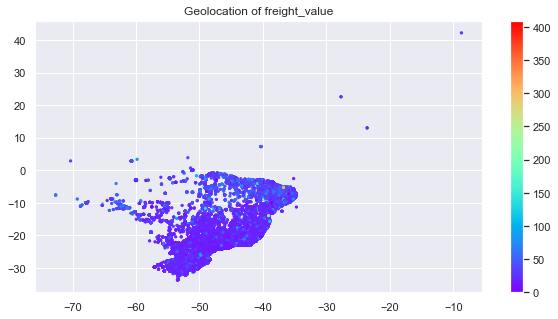

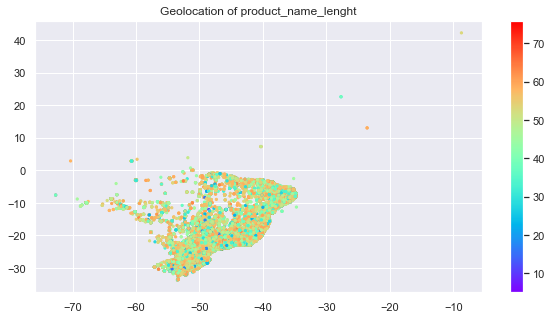

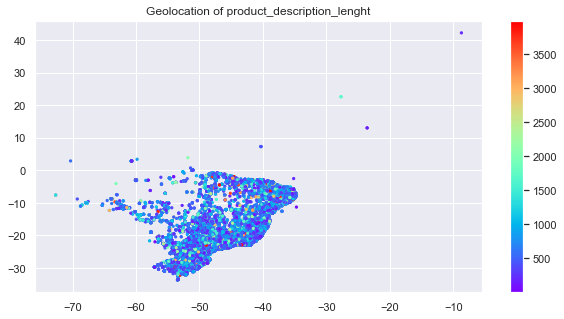

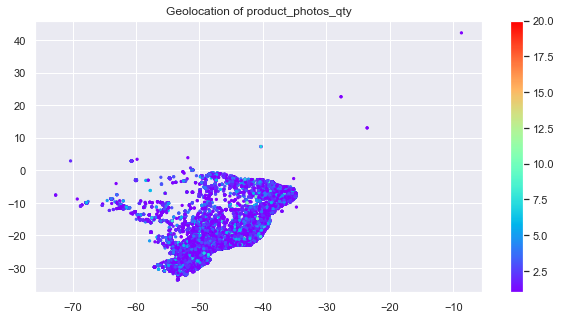

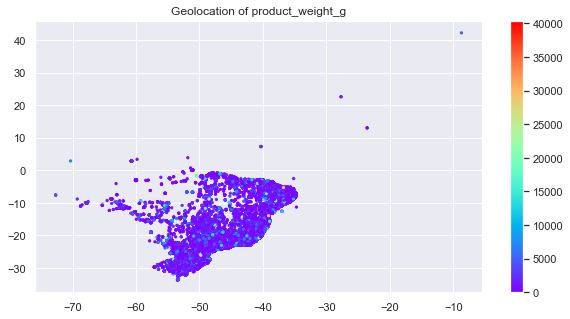

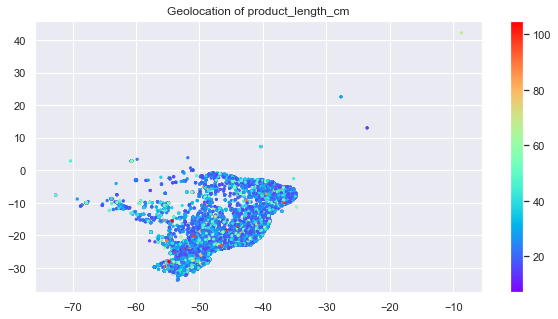

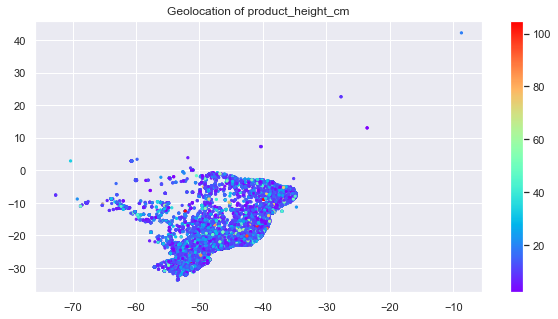

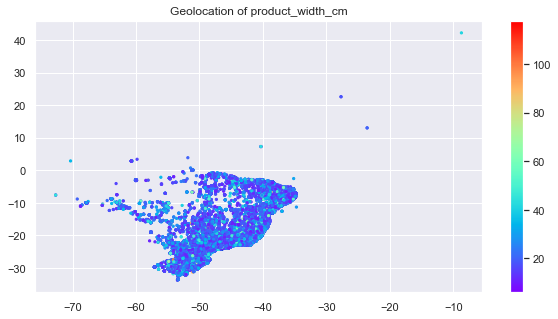

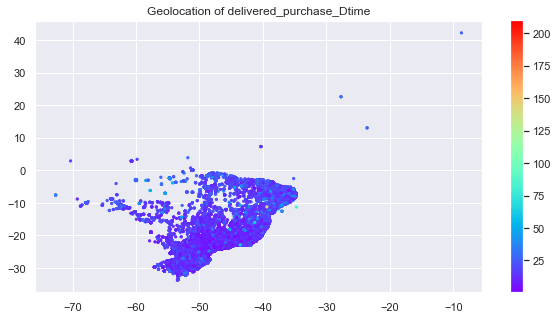

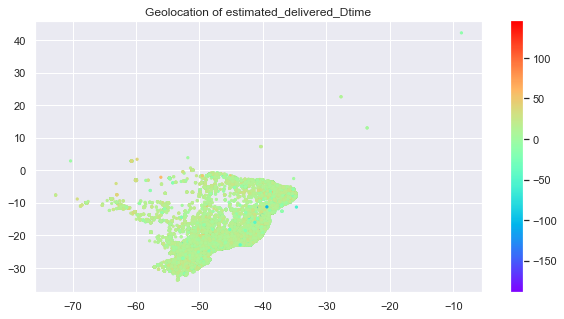

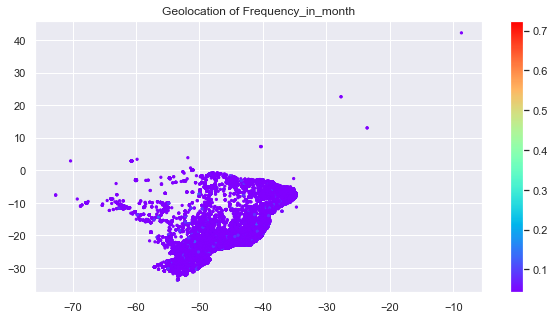

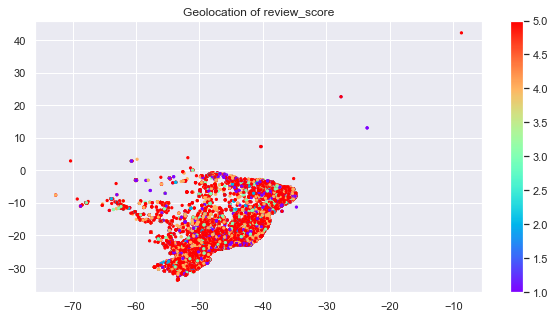

In [96]:
df_full_Nobj = df_full.drop(columns=['geolocation_lat','geolocation_lng']).select_dtypes(exclude='object')
list_df_full_Nobj = list(df_full_Nobj.columns)
list_df_full_Nobj
for il in list_df_full_Nobj:
    plt.figure(figsize=(10, 5))
    plt.scatter(df_full['geolocation_lng'],
                df_full['geolocation_lat'], 
                c=df_full[il],
                s=5,
                cmap='rainbow')
    plt.colorbar()
    plt.title('Geolocation of {}'.format(il))
    plt.show()

**Saving the dataframe for using it in the second notebook Nb2_classification where classification will be performed.**

In [97]:
df_full.to_csv('data_cleaned_updated2.csv', index=False)